In [ ]:
from sqlalchemy import create_engine
import pandas as pd 
from scipy import stats
import time 
import datetime 
import calendar 

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
from matplotlib.ticker import FuncFormatter
import math
from matplotlib.colors import ListedColormap
from scipy.stats import f_oneway

In [ ]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

#**Data Set:**



> This Dataset contains information about the startup ecosystem: organizations, individuals, company news, funding rounds, acquisitions, and IPOs.

>URL: https://www.kaggle.com/justinas/startup-investments

#**Project:**

> My goal for this project is to explore the startup investment world and conduct analysis to answer this 4 main categories: 


*   I will check how investments have been evolving over time and what type of companies were most popular within each year

*   I will conduct a deeper analysis of company types and use T-test analysis to compare fundings for some of these company types.  

*   I will also conduct a deeper analysis of Startup locations and how they compare in term of fundings. I will use T-test analysis to compare company type fundings within different locations.  

*   I will look at companies that were acquired only, what they may have in common and how their types compare. 





# **Importing tables and quick data exploration**


In [ ]:
link_ipos = 'https://drive.google.com/file/d/179cXTeuYf6ZMTrSm25AduewgA8ZoEJ7V/view?usp=sharing'

id = link_ipos.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
df_ipos = pd.read_csv('xclara.csv') 

In [ ]:
link_people = 'https://drive.google.com/file/d/14uzTswu65VcIAUG2UMyKTilElEIMOLX3/view?usp=sharing'

id = link_people.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
people_df = pd.read_csv('xclara.csv') 

In [ ]:
link_offices = 'https://drive.google.com/file/d/1MiEaLLbD2ZWWli69PTOh1tgjLukk1c9C/view?usp=sharing'

id = link_offices.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
offices_df = pd.read_csv('xclara.csv') 

In [ ]:
link_funds = 'https://drive.google.com/file/d/1tUS4SYSyU4XAJrRMMo-A8b9vILaQVLVu/view?usp=sharing'

id = link_funds.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
funds_df = pd.read_csv('xclara.csv') 

In [ ]:
link_investments = 'https://drive.google.com/file/d/13w5NBPH6iTMDAeX9_RadjkKKCAtlcts_/view?usp=sharing'

id = link_investments.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
investments_df = pd.read_csv('xclara.csv') 

In [ ]:
link_funding_rounds = 'https://drive.google.com/file/d/14CKALBdcJ3VDQ7dCAFJPeMtwmS5B185q/view?usp=sharing'

id = link_funding_rounds.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
funding_rounds_df = pd.read_csv('xclara.csv') 

Lets take a look at how many values we have for each fundings rounds. 
Because companies funded in each type of rounds can be very different, we will probably need to analyze our data by each funding round categories. 

In [ ]:
funding_rounds_df['funding_round_type'].nunique()

9

In [ ]:
round_type_count = funding_rounds_df['funding_round_type'].value_counts()
round_type_count

venture           15342
angel             13163
series-a           9873
series-b           4892
series-c+          4216
other              4201
private-equity     1043
crowdfunding        111
post-ipo             87
Name: funding_round_type, dtype: int64

From our database source: "any funding round that is clearly a venture round but where the series has not been specified."
This is a first exapmple of a small problem in our data. The venture section regroups all different types of funding rounds. This was not reported well in the database and we will need to remove the venture category in order to get a better analysis. 

In [ ]:
round_code_count = funding_rounds_df['funding_round_code'].value_counts()
round_code_count

unattributed        12227
seed                11608
a                    7999
b                    4892
debt_round           3409
angel                3239
partial              3115
c                    2499
d                    1129
private_equity       1043
grant                 776
e                     430
convertible           187
f                     145
crowd                 111
post_ipo_equity        80
secondary_market       16
g                      13
post_ipo_debt           7
crowd_equity            3
Name: funding_round_code, dtype: int64

In [ ]:
link_degrees = 'https://drive.google.com/file/d/1iBMGOLfPqTTr92tPdjSvH55WSB8Y4liL/view?usp=sharing'

id = link_degrees.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
degrees_df = pd.read_csv('xclara.csv') 

In [ ]:
degrees_df['degree_type'].nunique()

7148

In [ ]:
degree_type_count = degrees_df['degree_type'].value_counts()
degree_type_count.head()

BS     23425
BA     15342
MBA    15342
MS     11715
PhD     4056
Name: degree_type, dtype: int64

In [ ]:
link_acquisitions = 'https://drive.google.com/file/d/11JrFGS1oWXWIY27LhVI4hIs5P4Gp-qlW/view?usp=sharing'

id = link_acquisitions.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
acquisitions_df = pd.read_csv('xclara.csv') 

In [ ]:
link_relationships = 'https://drive.google.com/file/d/1cZPv1pWmdktWC7e20y-wGQ1aUWCPEoXi/view?usp=sharing'

id = link_relationships.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
relationships_df = pd.read_csv('xclara.csv') 

In [ ]:
link_objects = 'https://drive.google.com/file/d/1985nlyQ2xfxoP0rajh_vKh536Ll4JV06/view?usp=sharing'

id = link_objects.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('xclara.csv')   
  
objects_df = pd.read_csv('xclara.csv') 
objects_df.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462649 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [ ]:
objects_df.head(2)

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14


The object table is the main table. It contains data on companies(startups), as well as non-profits and people. People are a mix of people that have a link to the companies. 

We will focus on companies only. 

In [ ]:
objects_df = objects_df.drop(columns=['permalink','domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'overview', 'tag_list', 'created_by', 'created_at', 'updated_at'])

In [ ]:
objects_df['entity_type'].nunique()

4

In [ ]:
entity_count = objects_df['entity_type'].value_counts()
entity_count

Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64

In [ ]:
company_only = (objects_df['entity_type'] == 'Company')
company_df = objects_df.iloc[company_only.values]

# **Exploratory Analysis 1 - Investments over time**  


How have investments in different startup market categories evolved over the years ?
 

*   I will look at the total $ amount invested per year from 2000 to 2013.
*   I will also show corresponding market categories that got most fundings each year.


In [ ]:
company_df['category_code'].nunique()

42

In [ ]:
company_category_count = company_df['category_code'].value_counts()
company_category_count

software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
news                  768
hospitality           768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [ ]:
company_df = company_df.dropna(subset=['category_code'])
new_company_category_count = company_df['category_code'].value_counts()

In [ ]:
no_other = (company_df['category_code'] != 'other')
company_df = company_df.iloc[no_other.values]

I've cleaned our market category column. 

Below are all the market categories I will be analyzing. 

In [ ]:
new_company_category_count = company_df['category_code'].value_counts()
new_company_category_count

software            17922
web                 15118
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
news                  768
hospitality           768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit             184
nanotech    

Lets now look at the total fundings per year. 

I need to merge our funding_rounds table and object_table to get all info for investments in each categories. 

I will then group by year and see which market category had most fundings in each of the years we have. 

In [ ]:
funding_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [ ]:
funding_rounds_df['funded_at'].nunique()

3399

In [ ]:
funding_rounds_df = funding_rounds_df.dropna(subset=['funded_at'])

In [ ]:
funding_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52680 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52680 non-null  int64  
 1   funding_round_id          52680 non-null  int64  
 2   object_id                 52680 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52680 non-null  object 
 5   funding_round_code        52680 non-null  object 
 6   raised_amount_usd         52680 non-null  float64
 7   raised_amount             52680 non-null  float64
 8   raised_currency_code      49747 non-null  object 
 9   pre_money_valuation_usd   52680 non-null  float64
 10  pre_money_valuation       52680 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52680 non-null  float64
 13  post_money_valuation      52680 non-null  float64
 14  post_m

In [ ]:
funding_rounds_df['funded_at'] = pd.to_datetime(funding_rounds_df['funded_at'], format = '%Y-%m-%d')

In [ ]:
#lets now group by quarter periods 
fundings_by_Q = funding_rounds_df.groupby(funding_rounds_df['funded_at'].dt.to_period('Q'))['raised_amount_usd'].agg('mean')

In [ ]:
fundings_by_Q.head()

funded_at
1960Q1    7400000.0
1960Q4     468015.0
1973Q2          0.0
1974Q1          0.0
1974Q4          0.0
Freq: Q-DEC, Name: raised_amount_usd, dtype: float64

In [ ]:
# let's group by year 
fundings_by_Y = funding_rounds_df.groupby(funding_rounds_df['funded_at'].dt.to_period('Y'))['raised_amount_usd'].agg('sum')

In [ ]:
fundings_by_Y.head()

funded_at
1960    52736030.0
1973           0.0
1974           0.0
1984      141000.0
1985           0.0
Freq: A-DEC, Name: raised_amount_usd, dtype: float64

I checked our data in both quarters and years and decided to only check our timeline by years. 

After looking at all the years. Most of our data is for the most recent years. Even though I do have data for years prior to 2005, I want to keep our analysis to the most recent years. 

I will focus our analysis for the years 2005 to 2013. 

In [ ]:
company_df = company_df.rename(columns={'id': 'object_id'})

In [ ]:
funding_rounds_df.drop_duplicates().head(1)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29


In [ ]:
company_df.drop_duplicates().head(1)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17


In [ ]:
rounds_and_categories_df = pd.merge(company_df, funding_rounds_df, on = "object_id")

In [ ]:
rounds_and_categories_df.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,id,funding_round_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,888,888,2005-10-01,series-a,a,5250000.0,5250000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,1,http://seattlepi.nwsource.com/business/246734_...,NaN,initial-importer,2007-11-07 01:01:43,2008-05-19 03:39:17
1,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,889,889,2007-01-01,series-b,b,9500000.0,9500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,3,0,0,http://pulse2.com/2007/01/09/wiki-builder-webs...,NaN,initial-importer,2007-11-07 01:05:01,2008-05-19 03:39:17


In [ ]:
#I only want to analyse our data from 2005 to 2013 so lets drop everything prior to 2005
after_2005 = (rounds_and_categories_df['funded_at'].dt.year > 2004)
rounds_and_categories_df = rounds_and_categories_df.iloc[after_2005.values]

In [ ]:
fundings_per_year = pd.pivot_table(rounds_and_categories_df, values = ['funding_total_usd'], index= rounds_and_categories_df['funded_at'].dt.year, columns = rounds_and_categories_df['category_code'], aggfunc=np.sum)
fundings_per_year.head(2)

funding_total_usd                ...                           
category_code       advertising     analytics  ...       travel           web
funded_at                                      ...                           
2005               1.371834e+09  1.035735e+09  ...  513066458.0  3.233391e+09
2006               4.019719e+09  8.670509e+08  ...  641666458.0  5.373062e+09

[2 rows x 41 columns]

In [ ]:
fundings_per_year.columns = fundings_per_year.columns.droplevel(0)

In [ ]:
fundings_per_year['max_fundings'] = fundings_per_year.max(axis=1)
fundings_per_year['max_category'] = fundings_per_year.idxmax(axis=1)
fundings_per_year.head(2)

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,government,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,pets,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web,max_fundings,max_category
funded_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005,1.371834e+09,1.035735e+09,8.270690e+08,6.337559e+09,1.367802e+09,219340257.0,NaN,1.411823e+09,1501000.0,2.165083e+09,15000000.0,376870230.0,9.396962e+08,NaN,2.335643e+09,9810000.0,NaN,12374794.0,NaN,8.281322e+07,4.379350e+08,185980000.0,5.561043e+09,98093684.0,1.502165e+09,2.348971e+09,1.588206e+08,NaN,NaN,NaN,1.571800e+09,193447980.0,731019340.0,1.303604e+09,3.645998e+09,2.587224e+09,7.623311e+09,NaN,67911682.0,513066458.0,3.233391e+09,7.623311e+09,software
2006,4.019719e+09,8.670509e+08,1.352669e+09,8.897760e+09,5.683140e+09,166548821.0,NaN,2.072844e+09,209021724.0,2.761437e+09,NaN,906599230.0,2.415887e+09,150000.0,2.745818e+09,235689320.0,63000000.0,23000000.0,NaN,2.352023e+09,1.037755e+09,394135112.0,5.536010e+09,119075655.0,1.347085e+09,2.598319e+09,2.110872e+09,NaN,NaN,288299586.0,1.201535e+09,290267980.0,642385499.0,2.404513e+09,3.478072e+09,2.600025e+09,9.537313e+09,22500000.0,348788988.0,641666458.0,5.373062e+09,9.537313e+09,software


In [ ]:
fundings_per_year = fundings_per_year[['max_fundings','max_category']]
fundings_per_year.head(2)

category_code,max_fundings,max_category
funded_at,,
2005,7.623311e+09,software
2006,9.537313e+09,software


In [ ]:
new_df = fundings_per_year.reset_index().rename(columns = {"funded_at":"year"})
new_df.head(2)

category_code,year,max_fundings,max_category
0,2005,7.623311e+09,software
1,2006,9.537313e+09,software


In [ ]:
new_df['year_and_category'] = new_df['year'].astype(str) + ' --> ' + new_df['max_category'].astype(str)
new_df.head(2)

category_code,year,max_fundings,max_category,year_and_category
0,2005,7.623311e+09,software,2005 --> software
1,2006,9.537313e+09,software,2006 --> software


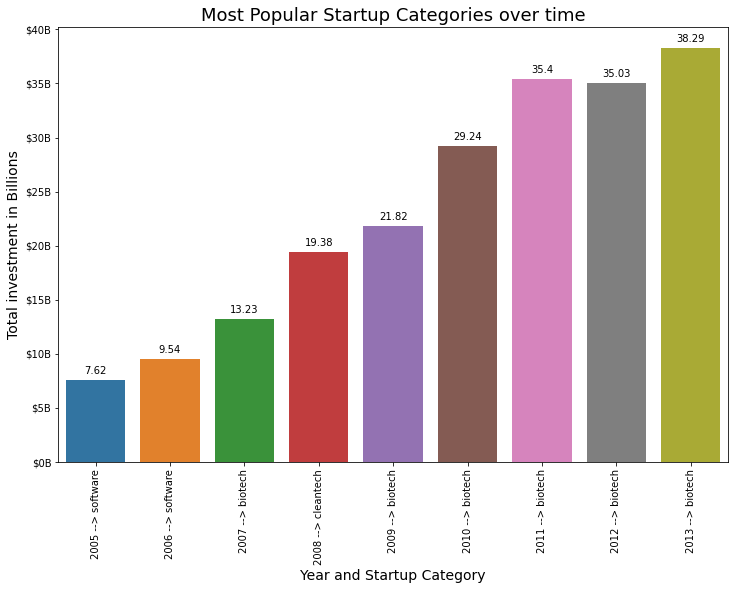

In [ ]:
#lets plot our chart 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'year_and_category' , y='max_fundings', data= new_df)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-9, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Year and Startup Category', size=14)
plt.ylabel('Total investment in Billions', size= 14)
plt.title('Most Popular Startup Categories over time', size = 18)
plt.xticks(rotation = 90)
splot.yaxis.set_major_formatter(formatter)

Biotech is clearly the leading category in term of funding amount. 
I should still look at most important funding round types to analyse further and see if Biotech leads also each of the funding round types. 

##Total fundings over time 
This shows the timeline for total invesmtent. 

For this timeline, I want to look at data from 2000 to 2013. 

In [ ]:
fundings_by_Y.to_frame()
fundings_by_Y.head(2)

funded_at
1960    52736030.0
1973           0.0
Freq: A-DEC, Name: raised_amount_usd, dtype: float64

In [ ]:
fundings_by_Y = fundings_by_Y.reset_index().rename(columns = {"funded_at":"year", "raised_amount_usd": "Total_USD_invested"})

In [ ]:
fundings_by_Y['year'] = fundings_by_Y['year'].dt.to_timestamp()

In [ ]:
fundings_by_Y.head(2)

,year,Total_USD_invested
0,1960-01-01,52736030.0
1,1973-01-01,0.0


In [ ]:
after_00 = (fundings_by_Y['year'].dt.year > 1999)
fundings_after00 = fundings_by_Y.iloc[after_00.values]

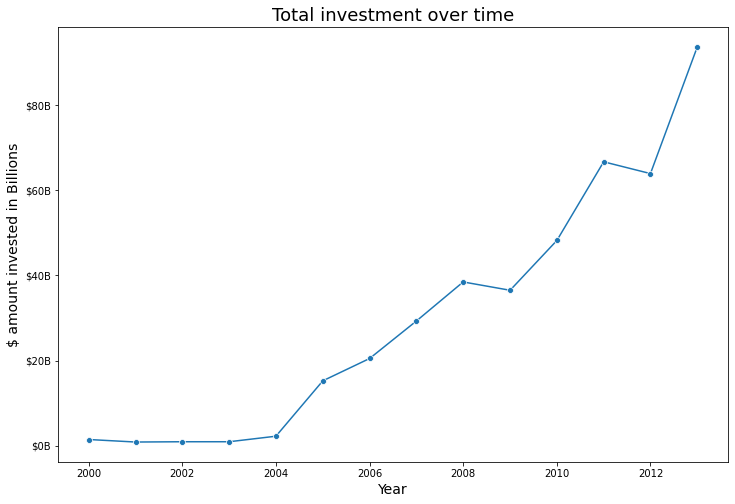

In [ ]:
def billions(x, pos):
  return '$%1.0fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
fundings_timeline = sns.lineplot(x= 'year' , y='Total_USD_invested', marker = 'o',data= fundings_after00)
plt.ylabel('$ amount invested in Billions', size = 14)
plt.xlabel('Year', size = 14)
plt.title('Total investment over time', size = 18)
fundings_timeline.yaxis.set_major_formatter(formatter)

As we can see, total investements have skyrocketted after the crisis in 2007. Its was adding up to more than $100 billion dollars in 2013. 

# **Exploratory Analysis 2 - Investments over time**


I will take a closer look at total investments over the years per funding rounds. 

Funding rounds are important because they usually determine at which stage a company is at. With angel rounds, companies tend be on the smaller side and tend to still be in full developpment mode. This means that the stage of a company funded with an angel round will greatly differ from a company funded at a series-c round. 

Because of this notion, I've decided to take a closer analysis at total invesments per funding rounds. 

My question is: 

How is the investment trend for each rounds in terms of total fundings and top market categories per round?

*   I will focus on showing angel, series a, series b and series c+ round types 
*   I will show which market category got the most fundings each year and by specific round type



In [ ]:
angel_df_avg = rounds_and_categories_df.iloc[(rounds_and_categories_df['funding_round_type']== 'angel').values]
angel_df_avg.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,id,funding_round_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
4,c:10014,Company,10014,NaN,Mobclix,mobclix,mobile,acquired,2008-03-01,NaN,NaN,iPhone Ad Exchange Provider,USA,CA,Palo Alto,SF Bay,NaN,NaN,0,0,2008-09-01,2008-09-01,1,0.0,1995-03-01,2012-09-18,4,9,6682,6682,2008-09-01,angel,seed,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1,1,1,http://uk.techcrunch.com/2008/09/19/seedcamps-...,Seedcamp's winners reflect Europe's startup st...,NaN,2009-06-18 17:59:16,2012-06-06 17:50:10
17,c:100228,Company,100228,NaN,iHireHelp,ihirehelp,education,operating,2010-10-01,NaN,NaN,Tutor Student Match,USA,NJ,NaN,New Jersey - Other,NaN,NaN,0,0,2011-04-16,2011-04-16,1,100000.0,2010-10-01,2010-10-01,1,0,25187,25187,2011-04-16,angel,angel,100000.0,100000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,0,1,1,NaN,NaN,ihirehelp,2011-09-07 02:57:58,2011-10-08 04:35:46


In [ ]:
fundings_per_year_angel_avg = pd.pivot_table(angel_df_avg, values = ['funding_total_usd'], index= angel_df_avg['funded_at'].dt.year, columns = angel_df_avg['category_code'], aggfunc=np.sum)
fundings_per_year_angel_avg.head(2)

funding_total_usd               ...                    
category_code       advertising    analytics  ... travel          web
funded_at                                     ...                    
2005                156911925.0  658008017.0  ...    NaN  138896124.0
2006                515841398.0    9732745.0  ...    NaN  400760543.0

[2 rows x 41 columns]

In [ ]:
fundings_per_year_angel_avg.columns = fundings_per_year_angel_avg.columns.droplevel(0)

In [ ]:
fundings_per_year_angel_avg['max_fundings'] = fundings_per_year_angel_avg.max(axis=1)
fundings_per_year_angel_avg['max_category'] = fundings_per_year_angel_avg.idxmax(axis=1)
fundings_per_year_angel_avg.head(2)

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,government,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,pets,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web,max_fundings,max_category
funded_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005,156911925.0,658008017.0,4068970.0,80141599.0,81575000.0,0.0,NaN,327433621.0,1501000.0,123298100.0,NaN,53000000.0,287560000.0,NaN,13584225.0,NaN,NaN,1000000.0,NaN,NaN,57876839.0,NaN,162954658.0,NaN,NaN,11225000.0,1470552.0,NaN,NaN,NaN,2493705.0,NaN,NaN,6450000.0,500000.0,NaN,81972737.0,NaN,NaN,NaN,138896124.0,658008017.0,analytics
2006,515841398.0,9732745.0,NaN,40971840.0,2744718.0,3930000.0,NaN,57730012.0,NaN,90014858.0,NaN,97700000.0,277644628.0,NaN,850000.0,NaN,NaN,NaN,NaN,6000000.0,6230757.0,79628515.0,6475000.0,35150000.0,NaN,187991448.0,25762000.0,NaN,NaN,NaN,5269491.0,NaN,7613438.0,50500000.0,20150000.0,4715000.0,379541697.0,NaN,6102767.0,NaN,400760543.0,515841398.0,advertising


In [ ]:
fundings_per_year_angel_avg = fundings_per_year_angel_avg[['max_fundings','max_category']]
fundings_per_year_angel_avg.head(2)

category_code,max_fundings,max_category
funded_at,,
2005,658008017.0,analytics
2006,515841398.0,advertising


In [ ]:
new_df_angel_avg = fundings_per_year_angel_avg.reset_index().rename(columns = {"funded_at":"year"})
new_df_angel_avg.head(2)

category_code,year,max_fundings,max_category
0,2005,658008017.0,analytics
1,2006,515841398.0,advertising


In [ ]:
new_df_angel_avg['year_and_category'] = new_df_angel_avg['year'].astype(str) + ' --> ' + new_df_angel_avg['max_category'].astype(str)
new_df_angel_avg.head(2)

category_code,year,max_fundings,max_category,year_and_category
0,2005,658008017.0,analytics,2005 --> analytics
1,2006,515841398.0,advertising,2006 --> advertising


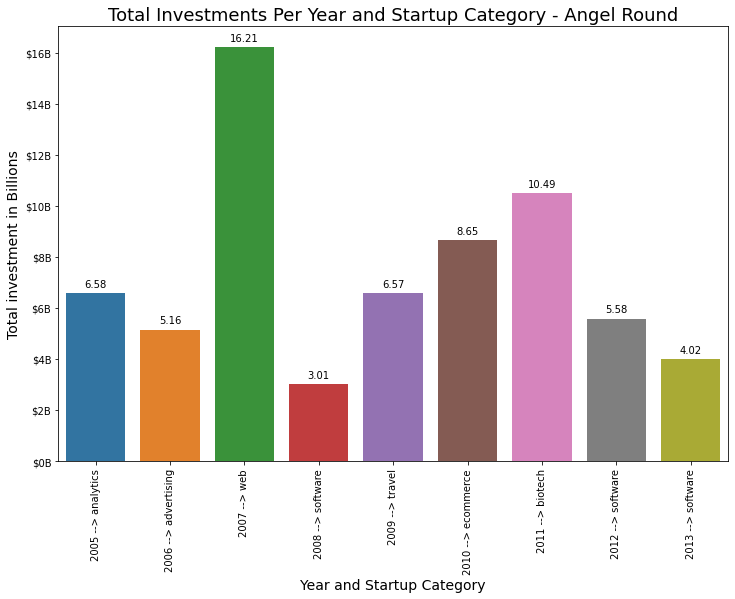

In [ ]:
#lets plot our chart 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-8)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'year_and_category' , y='max_fundings', data= new_df_angel_avg)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-8, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Year and Startup Category', size=14)
plt.ylabel('Total investment in Billions', size= 14)
plt.title('Total Investments Per Year and Startup Category - Angel Round', size = 18)
plt.xticks(rotation = 90)
splot.yaxis.set_major_formatter(formatter)

The most we can get out of this graph is that the top funded categories for angel rounds was very diverse over the years and has been both in software for the last two most recent years. 

In [ ]:
#lets now look at series-a round  
seriesa_df_avg = rounds_and_categories_df.iloc[(rounds_and_categories_df['funding_round_type']== 'series-a').values]
seriesa_df_avg.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,id,funding_round_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,888,888,2005-10-01,series-a,a,5250000.0,5250000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,2,0,1,http://seattlepi.nwsource.com/business/246734_...,NaN,initial-importer,2007-11-07 01:01:43,2008-05-19 03:39:17
3,c:1001,Company,1001,NaN,FriendFeed,friendfeed,web,acquired,2007-10-01,NaN,NaN,Social network aggregator,USA,CA,Mountain View,SF Bay,NaN,NaN,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,1644,1644,2008-02-26,series-a,a,5000000.0,5000000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,3,1,1,http://www.techcrunch.com/2008/02/25/friendfee...,TechCrunch,initial-importer,2008-02-26 05:05:42,2009-08-10 19:46:53


In [ ]:
fundings_per_year_seriesa_avg = pd.pivot_table(seriesa_df_avg, values = ['funding_total_usd'], index= seriesa_df_avg['funded_at'].dt.year, columns = seriesa_df_avg['category_code'], aggfunc=np.sum)
fundings_per_year_seriesa_avg.head(2)

funding_total_usd               ...                           
category_code       advertising    analytics  ...       travel           web
funded_at                                     ...                           
2005               6.608169e+08  254606776.0  ...  513066458.0  9.361348e+08
2006               1.960641e+09  273784579.0  ...    4600000.0  1.352129e+09

[2 rows x 41 columns]

In [ ]:
fundings_per_year_seriesa_avg.columns = fundings_per_year_seriesa_avg.columns.droplevel(0)

In [ ]:
fundings_per_year_seriesa_avg['max_fundings'] = fundings_per_year_seriesa_avg.max(axis=1)
fundings_per_year_seriesa_avg['max_category'] = fundings_per_year_seriesa_avg.idxmax(axis=1)
fundings_per_year_seriesa_avg.head(2)

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,government,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,pets,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web,max_fundings,max_category
funded_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005,6.608169e+08,254606776.0,NaN,1.541607e+09,9.314999e+08,46215715.0,NaN,428491316.0,NaN,6.553758e+08,NaN,187900000.0,363953306.0,NaN,597321693.0,9810000.0,NaN,11374794.0,NaN,43307342.0,47000000.0,55990000.0,1.567282e+09,21693684.0,580859998.0,317501776.0,1.299000e+08,NaN,NaN,NaN,199573651.0,193447980.0,365650000.0,619674855.0,1.058651e+09,2.587224e+09,1.931774e+09,NaN,1390000.0,513066458.0,9.361348e+08,2.587224e+09,social
2006,1.960641e+09,273784579.0,4068970.0,2.271841e+09,2.632683e+09,69230000.0,NaN,629175102.0,111010000.0,1.026507e+09,NaN,382827000.0,430695160.0,NaN,310612339.0,41000000.0,NaN,23000000.0,NaN,221405000.0,349685388.0,162068400.0,1.224616e+09,37000000.0,57799994.0,732292500.0,1.369207e+09,NaN,NaN,166000000.0,115868471.0,NaN,105859651.0,937117840.0,5.903841e+08,9.498000e+07,2.543685e+09,NaN,237271855.0,4600000.0,1.352129e+09,2.632683e+09,cleantech


In [ ]:
fundings_per_year_seriesa_avg = fundings_per_year_seriesa_avg[['max_fundings','max_category']]
fundings_per_year_seriesa_avg.head(2)

category_code,max_fundings,max_category
funded_at,,
2005,2.587224e+09,social
2006,2.632683e+09,cleantech


In [ ]:
new_df_seriesa_avg = fundings_per_year_seriesa_avg.reset_index().rename(columns = {"funded_at":"year"})
new_df_seriesa_avg.head(2)

category_code,year,max_fundings,max_category
0,2005,2.587224e+09,social
1,2006,2.632683e+09,cleantech


In [ ]:
new_df_seriesa_avg['year_and_category'] = new_df_seriesa_avg['year'].astype(str) + ' --> ' + new_df_seriesa_avg['max_category'].astype(str)
new_df_seriesa_avg.head(2)

category_code,year,max_fundings,max_category,year_and_category
0,2005,2.587224e+09,social,2005 --> social
1,2006,2.632683e+09,cleantech,2006 --> cleantech


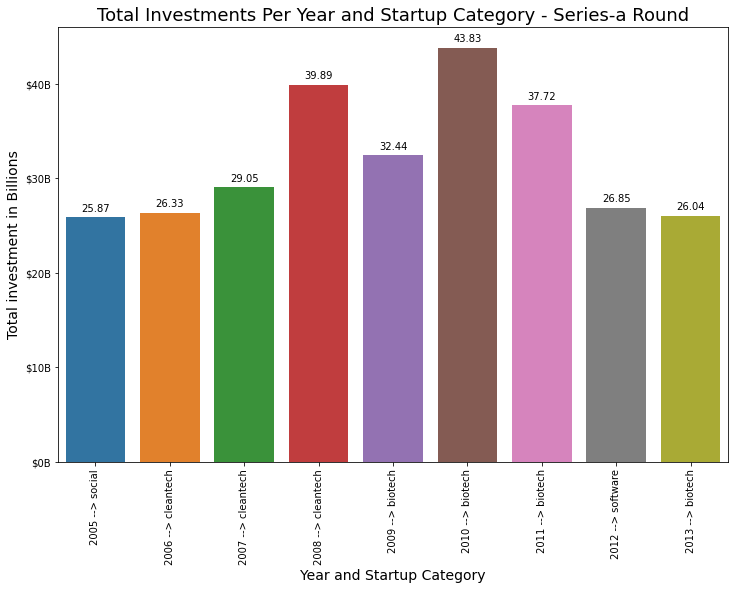

In [ ]:
#lets plot our chart 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-8)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'year_and_category' , y='max_fundings', data= new_df_seriesa_avg)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-8, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Year and Startup Category', size=14)
plt.ylabel('Total investment in Billions', size= 14)
plt.title('Total Investments Per Year and Startup Category - Series-a Round', size = 18)
plt.xticks(rotation = 90)
splot.yaxis.set_major_formatter(formatter)

We can see here that throuh the years, cleantech was first the most prevalent category and for the most recent years it switched to biotech companies. 

In [ ]:
###lets now look at series-b round  
seriesb_df_avg = rounds_and_categories_df.iloc[(rounds_and_categories_df['funding_round_type']== 'series-b').values]
seriesb_df_avg.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,id,funding_round_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
1,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,889,889,2007-01-01,series-b,b,9500000.0,9500000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,3,0,0,http://pulse2.com/2007/01/09/wiki-builder-webs...,NaN,initial-importer,2007-11-07 01:05:01,2008-05-19 03:39:17
6,c:10015,Company,10015,NaN,Fitbit,fitbit,health,operating,2007-10-01,NaN,"Fitbit offers compact, wireless, wearable sens...",NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2008-10-10,2013-08-13,5,68069200.0,NaN,NaN,0,14,18213,18213,2010-09-10,series-b,b,9000000.0,9000000.0,USD,0.0,0.0,USD,0.0,0.0,USD,4,0,0,http://techcrunch.com/2010/09/10/fitbit-8-mill...,Fitness Tracker Fitbit Gains Another $8 Million,sophia,2010-09-11 03:46:52,2013-04-29 17:59:40


In [ ]:
fundings_per_year_seriesb_avg = pd.pivot_table(seriesb_df_avg, values = ['funding_total_usd'], index= seriesb_df_avg['funded_at'].dt.year, columns = seriesb_df_avg['category_code'], aggfunc=np.sum)
fundings_per_year_seriesb_avg.head(2)

funding_total_usd               ...                           
category_code       advertising    analytics  ...       travel           web
funded_at                                     ...                           
2005                286629720.0  117066943.0  ...          NaN  3.327400e+08
2006                567198330.0  232007836.0  ...  513066458.0  1.407888e+09

[2 rows x 40 columns]

In [ ]:
fundings_per_year_seriesb_avg.columns = fundings_per_year_seriesb_avg.columns.droplevel(0)

In [ ]:
fundings_per_year_seriesb_avg['max_fundings'] = fundings_per_year_seriesb_avg.max(axis=1)
fundings_per_year_seriesb_avg['max_category'] = fundings_per_year_seriesb_avg.idxmax(axis=1)
fundings_per_year_seriesb_avg.head(2)

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,pets,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web,max_fundings,max_category
funded_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005,286629720.0,117066943.0,823000000.0,1.815063e+09,1.263072e+08,62791271.0,NaN,NaN,NaN,6.403356e+08,15000000.0,NaN,223900000.0,687975498.0,NaN,NaN,NaN,NaN,3.950588e+07,287102423.0,129990000.0,1.120518e+09,NaN,564806769.0,230250000.0,27450000.0,NaN,NaN,NaN,287110000.0,NaN,318569340.0,163400000.0,5.970900e+08,NaN,1.754488e+09,NaN,NaN,NaN,3.327400e+08,1.815063e+09,biotech
2006,567198330.0,232007836.0,NaN,2.559644e+09,1.397089e+09,38500000.0,NaN,464644805.0,80750000.0,1.034978e+09,NaN,263752000.0,628717200.0,574492765.0,176689320.0,NaN,NaN,NaN,1.765504e+09,173909021.0,56930000.0,1.030020e+09,NaN,714585151.0,359240507.0,65900000.0,NaN,NaN,120000000.0,175918720.0,193447980.0,91019000.0,674311119.0,1.042643e+09,2.500330e+09,1.940530e+09,NaN,44709996.0,513066458.0,1.407888e+09,2.559644e+09,biotech


In [ ]:
fundings_per_year_seriesb_avg = fundings_per_year_seriesb_avg[['max_fundings','max_category']]
fundings_per_year_seriesb_avg.head(2)

category_code,max_fundings,max_category
funded_at,,
2005,1.815063e+09,biotech
2006,2.559644e+09,biotech


In [ ]:
new_df_seriesb_avg = fundings_per_year_seriesb_avg.reset_index().rename(columns = {"funded_at":"year"})
new_df_seriesb_avg.head(2)

category_code,year,max_fundings,max_category
0,2005,1.815063e+09,biotech
1,2006,2.559644e+09,biotech


In [ ]:
new_df_seriesb_avg['year_and_category'] = new_df_seriesb_avg['year'].astype(str) + ' --> ' + new_df_seriesb_avg['max_category'].astype(str)
new_df_seriesb_avg.head(2)

category_code,year,max_fundings,max_category,year_and_category
0,2005,1.815063e+09,biotech,2005 --> biotech
1,2006,2.559644e+09,biotech,2006 --> biotech


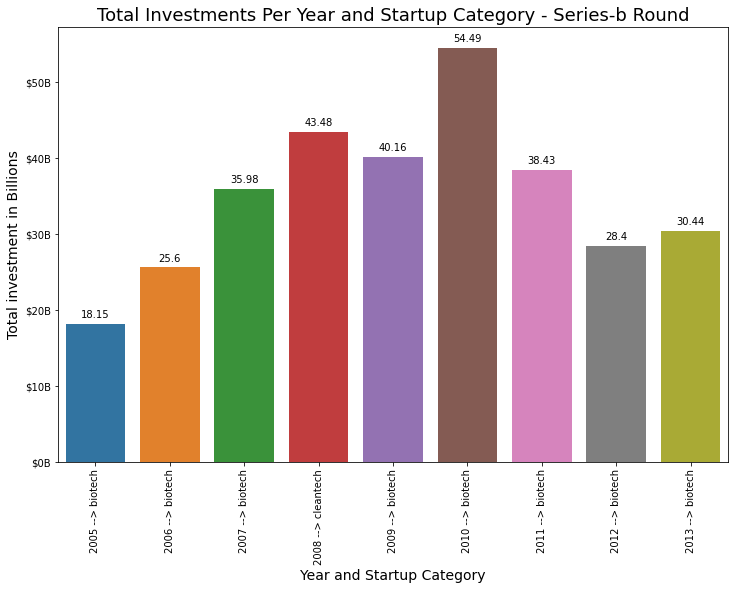

In [ ]:
#lets plot the chart 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-8)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'year_and_category' , y='max_fundings', data= new_df_seriesb_avg)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-8, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Year and Startup Category', size=14)
plt.ylabel('Total investment in Billions', size= 14)
plt.title('Total Investments Per Year and Startup Category - Series-b Round', size = 18)
plt.xticks(rotation = 90)
splot.yaxis.set_major_formatter(formatter)

Biotech is clearly the leading category for total investment in series-b rounds. 

In [ ]:
###lets now look at series-c+ round  
seriesc_df_avg = rounds_and_categories_df.iloc[(rounds_and_categories_df['funding_round_type']== 'series-c+').values]
seriesc_df_avg.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,id,funding_round_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,pre_money_valuation,pre_money_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
2,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,2312,2312,2008-05-19,series-c+,c,25000000.0,25000000.0,USD,0.0,0.0,NaN,0.0,0.0,NaN,4,1,0,http://www.accel.com/news/news_one_up.php?news...,Accel,mike,2008-05-19 03:39:17,2008-11-04 04:24:30
7,c:10015,Company,10015,NaN,Fitbit,fitbit,health,operating,2007-10-01,NaN,"Fitbit offers compact, wireless, wearable sens...",NaN,USA,CA,San Francisco,SF Bay,NaN,NaN,0,0,2008-10-10,2013-08-13,5,68069200.0,NaN,NaN,0,14,27747,27747,2012-01-24,series-c+,c,12000000.0,12000000.0,USD,0.0,0.0,USD,0.0,0.0,USD,4,0,0,http://techcrunch.com/2012/01/24/fitness-track...,Fitness Tracker Fitbit Raises $12M To Market N...,timircha,2012-01-24 13:02:46,2013-04-29 17:59:41


In [ ]:
fundings_per_year_seriesc_avg = pd.pivot_table(seriesc_df_avg, values = ['funding_total_usd'], index= seriesc_df_avg['funded_at'].dt.year, columns = seriesc_df_avg['category_code'], aggfunc=np.sum)
fundings_per_year_seriesc_avg.head(2)

funding_total_usd               ...                     
category_code       advertising    analytics  ... travel           web
funded_at                                     ...                     
2005                120834875.0          NaN  ...    NaN  6.057900e+08
2006                362178720.0  103533162.0  ...    NaN  1.203644e+09

[2 rows x 39 columns]

In [ ]:
fundings_per_year_seriesc_avg.columns = fundings_per_year_seriesc_avg.columns.droplevel(0)

In [ ]:
fundings_per_year_seriesc_avg['max_fundings'] = fundings_per_year_seriesc_avg.max(axis=1)
fundings_per_year_seriesc_avg['max_category'] = fundings_per_year_seriesc_avg.idxmax(axis=1)
fundings_per_year_seriesc_avg.head(2)

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,hardware,health,hospitality,legal,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,pets,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web,max_fundings,max_category
funded_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005,120834875.0,NaN,NaN,7.492557e+08,94400000.0,NaN,NaN,583073217.0,NaN,367328635.0,NaN,127620230.0,50640000.0,661138873.0,NaN,NaN,NaN,NaN,24100000.0,NaN,1.417569e+09,56300000.0,144773415.0,689775616.0,NaN,NaN,NaN,NaN,763647054.0,NaN,11800000.0,107679000.0,1.089926e+09,NaN,1.608179e+09,NaN,60704370.0,NaN,6.057900e+08,1.608179e+09,software
2006,362178720.0,103533162.0,823000000.0,1.829931e+09,275388886.0,NaN,NaN,483905435.0,NaN,336968829.0,NaN,162320230.0,306800000.0,902469136.0,NaN,NaN,NaN,76205883.0,130003458.0,92500000.0,2.155712e+09,41500019.0,520000000.0,662558144.0,650002813.0,NaN,NaN,NaN,264325271.0,NaN,389293410.0,316634194.0,1.143460e+09,NaN,1.945356e+09,NaN,NaN,NaN,1.203644e+09,2.155712e+09,mobile


In [ ]:
fundings_per_year_seriesc_avg = fundings_per_year_seriesc_avg[['max_fundings','max_category']]
fundings_per_year_seriesc_avg.head(2)

category_code,max_fundings,max_category
funded_at,,
2005,1.608179e+09,software
2006,2.155712e+09,mobile


In [ ]:
new_df_seriesc_avg = fundings_per_year_seriesc_avg.reset_index().rename(columns = {"funded_at":"year"})
new_df_seriesc_avg.head(2) 

category_code,year,max_fundings,max_category
0,2005,1.608179e+09,software
1,2006,2.155712e+09,mobile


In [ ]:
new_df_seriesc_avg['year_and_category'] = new_df_seriesc_avg['year'].astype(str) + ' --> ' + new_df_seriesc_avg['max_category'].astype(str)
new_df_seriesc_avg.head(2)

category_code,year,max_fundings,max_category,year_and_category
0,2005,1.608179e+09,software,2005 --> software
1,2006,2.155712e+09,mobile,2006 --> mobile


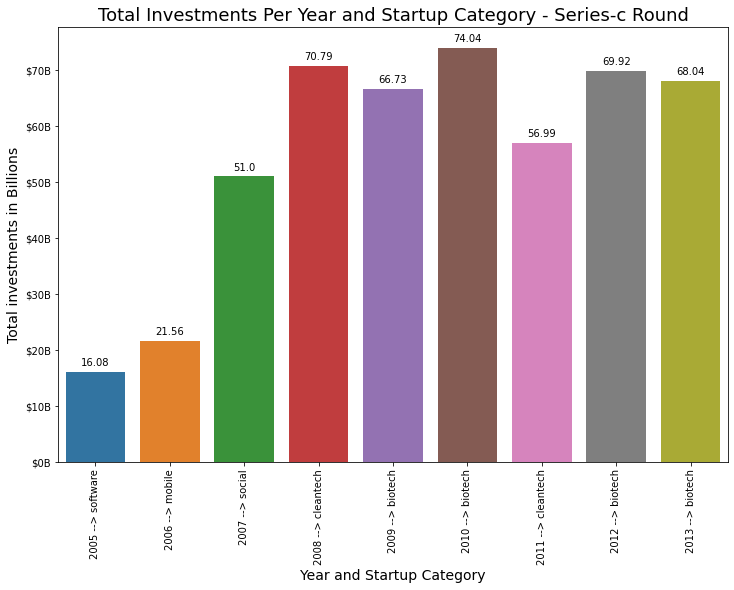

In [ ]:
#lets plot the chart 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-8)

formatter = FuncFormatter(billions)
#plotting 
plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'year_and_category' , y='max_fundings', data= new_df_seriesc_avg)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-8, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Year and Startup Category', size=14)
plt.ylabel('Total investments in Billions', size= 14)
plt.title('Total Investments Per Year and Startup Category - Series-c Round', size = 18)
plt.xticks(rotation = 90)
splot.yaxis.set_major_formatter(formatter)

Biotech is still clearly the most funded category. As expected we also get more fundings for rounds c+ as they tend to be larger type of fundings. 

# **Exploratory Analysis 3 - Acquired Companies**

This will be an intro part for my presentation. 

I want to show the status of startups accross all our data  
What percentage of the startups are:

*   Still operating 
*   Acquired
*   Gone IPO
*   No longer operating 




In [ ]:
company_df.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,NaN,Flektor,flektor,games_video,acquired,NaN,NaN,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6


In [ ]:
company_df['status'].value_counts()

operating    99937
acquired      6232
closed        2391
ipo           1009
Name: status, dtype: int64

In [ ]:
dupes=company_df.duplicated()
sum(dupes)

0

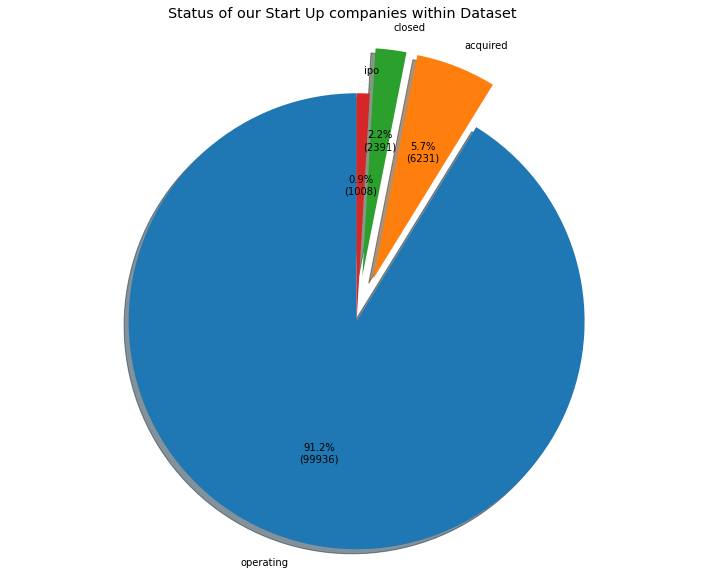

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rcParams['figure.figsize'] = 10,8
labels = company_df['status'].value_counts().index.tolist()
sizes = company_df['status'].value_counts().tolist()
explode = (0, 0.2, 0.2, 0)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),shadow=True, startangle=90)
ax1.axis('equal')
fig1.tight_layout()
plt.title("Status of our Start Up companies within Dataset", fontdict=None, position= [0.48,1], size = 'x-large')
plt.show()

This chart clearly shows that most of the companies in our data are still in operating status. 

The second category below is companies that have been acquired. 

Even though this isn't the status with the most companies, I still want to do some analysis on companies that have been acquired. 

On an investor standpoint, a company that you've invested in getting acquired is a pretty good outcome that you may want to see more often. Its mainly because the funds invested will get back to you quicker than if the company was lets say going IPO or could still potentially go broke if still in operation. 

I will therefore dig a little further in the analysis below showing company categories that got most acquired as well as which categories has acquired the most of other categories.  

# **Exploratory Analysis 4 - Investments over time**

This will show the trend for total investments by round type. 

This is just a graph that shows the timeline

I will focus on angel, series-a, series-b, series c+ and private-equity. 

I will also focus on the years from 2005 to 2013 



In [ ]:
round_type_count = funding_rounds_df['funding_round_type'].value_counts()
round_type_count

venture           15300
angel             13013
series-a           9828
series-b           4890
series-c+          4213
other              4195
private-equity     1043
crowdfunding        111
post-ipo             87
Name: funding_round_type, dtype: int64

In [ ]:
rounds_df_mother_2 = rounds_and_categories_df[['funding_round_type', 'funded_at', 'funding_total_usd']]
rounds_df_mother_2.head(2)

,funding_round_type,funded_at,funding_total_usd
0,series-a,2005-10-01,39750000.0
1,series-b,2007-01-01,39750000.0


In [ ]:
rounds_df_mother_2 = rounds_df_mother_2.iloc[(rounds_df_mother_2['funding_total_usd'] != 0.0).values]

In [ ]:
rounds_df_mother_2['funded_at'] = rounds_df_mother_2['funded_at'].dt.year
rounds_df_mother_2.head()

,funding_round_type,funded_at,funding_total_usd
0,series-a,2005,39750000.0
1,series-b,2007,39750000.0
2,series-c+,2008,39750000.0
3,series-a,2008,5000000.0
5,series-a,2008,68069200.0


In [ ]:
rounds_df = rounds_df_mother_2.groupby(['funding_round_type', 'funded_at'])['funding_total_usd'].sum()
rounds_df = rounds_df.to_frame()

In [ ]:
rounds_df = rounds_df.reset_index()
rounds_df.head(3)

,funding_round_type,funded_at,funding_total_usd
0,angel,2005,2.251922e+09
1,angel,2006,2.319051e+09
2,angel,2007,4.875799e+09


In [ ]:
by_year = rounds_df.pivot(index='funded_at', columns='funding_round_type', values= 'funding_total_usd')
by_year = by_year.reset_index()

In [ ]:
by_year.head(3)

funding_round_type,funded_at,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
0,2005,2.251922e+09,NaN,1.549143e+08,1.000000e+09,22922870.0,1.685909e+10,1.065109e+10,9.334536e+09,9.999258e+09
1,2006,2.319051e+09,NaN,6.284245e+08,NaN,344194102.0,2.046905e+10,2.088842e+10,1.517769e+10,1.491722e+10
2,2007,4.875799e+09,NaN,2.265758e+09,2.502468e+08,25234078.0,2.384024e+10,2.109078e+10,2.885530e+10,1.519692e+10


In [ ]:
by_year = by_year[['funded_at','angel', 'series-a', 'series-b', 'series-c+', 'private-equity']]
by_year.head(3)

funding_round_type,funded_at,angel,series-a,series-b,series-c+,private-equity
0,2005,2.251922e+09,1.685909e+10,1.065109e+10,9.334536e+09,22922870.0
1,2006,2.319051e+09,2.046905e+10,2.088842e+10,1.517769e+10,344194102.0
2,2007,4.875799e+09,2.384024e+10,2.109078e+10,2.885530e+10,25234078.0


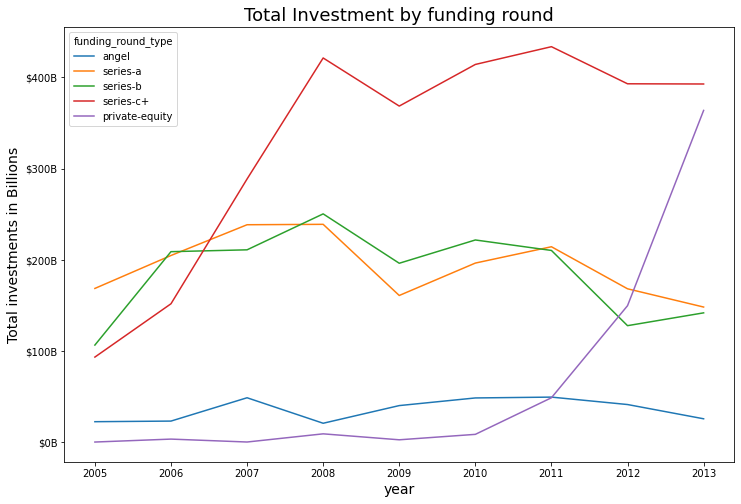

In [ ]:
#now lets graph 
def billions(x, pos):
  return '$%1.0fB' % (x * 1e-8)

formatter = FuncFormatter(billions)

lines = by_year.plot.line(x='funded_at',figsize=(12,8))
plt.ylabel('Total investments in Billions', size = 14)
plt.xlabel('year', size = 14)
plt.title('Total Investment by funding round', size = 18)
lines.yaxis.set_major_formatter(formatter)

This chart shows a significant rise in private-equity type of fundings within the last few years and starting in 2011. 
Fundings in series-a and series-b round seems to have leveled off over the years and even dropped a bit over the most recent years. 
On the other side, investemnts in series-c rounds have risen in the early years and leveled off therafter but still staying

# **Exploratory Analysis 5 - Regions and categories**

This will show the total investments per region. 

The column Region in our data contains both city names and region or area names such as the Bay Area. 

I will only show Regions that are in the top 10 in terms of amount of investments. 

I will then show the total fundings in each of these 10 regions.  

In [ ]:
company_only_2 = (objects_df['entity_type'] == 'Company')
company_df_new = objects_df.iloc[company_only.values]

In [ ]:
company_df_new.head(2)

,id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,NaN,Flektor,flektor,games_video,acquired,NaN,NaN,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6


In [ ]:
region_df = company_df_new[['region', 'funding_total_usd']]

In [ ]:
region_df.head(2)

,region,funding_total_usd
0,Seattle,39750000.0
1,Los Angeles,0.0


In [ ]:
region_df = region_df.iloc[(region_df['funding_total_usd'] != 0.0).values]

In [ ]:
region_df_count = region_df['region'].value_counts()
region_df_count.head(12)

SF Bay           4723
unknown          1945
New York         1729
Boston           1408
Los Angeles      1119
London            919
Seattle           629
Washington DC     607
San Diego         456
Chicago           397
Denver            394
Austin            394
Name: region, dtype: int64

In [ ]:
#lets get rid of unknown regions
region_df = region_df.iloc[(region_df['region'] != 'unknown').values]

In [ ]:
region_df.head()

,region,funding_total_usd
0,Seattle,39750000.0
13,SF Bay,5000000.0
19,SF Bay,68069200.0
20,Austin,10125293.0
24,SF Bay,33000000.0


In [ ]:
region_df_grouped = region_df.groupby(['region']).sum().reset_index()

In [ ]:
region_df_grouped = region_df_grouped.sort_values(by='funding_total_usd', ascending=False)

In [ ]:
region_df_grouped

,region,funding_total_usd
1700,SF Bay,1.051880e+11
1363,New York,2.929534e+10
231,Boston,2.887391e+10
1092,Los Angeles,1.841264e+10
1794,Seattle,1.378931e+10
...,...,...
513,Duluth,1.500000e+03
2184,Whistler BC,1.200000e+03
927,Kanagawa-ken,1.100000e+03
1186,Massillon,1.000000e+03


In [ ]:
region_df_top10 = region_df_grouped.head(10)

In [ ]:
region_df_top10

,region,funding_total_usd
1700,SF Bay,1.051880e+11
1363,New York,2.929534e+10
231,Boston,2.887391e+10
1092,Los Angeles,1.841264e+10
1794,Seattle,1.378931e+10
2141,Washington DC,1.147303e+10
1751,San Diego,1.064416e+10
1086,London,1.045911e+10
367,Chicago,6.979307e+09
88,Austin,5.578815e+09


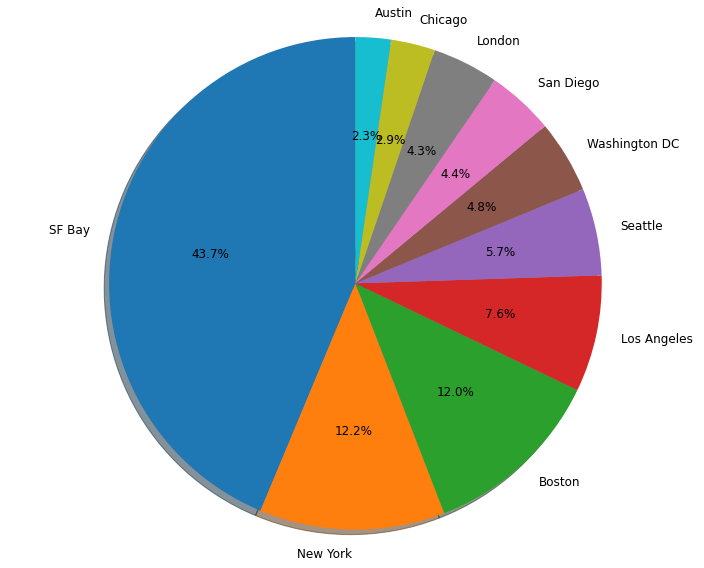

In [ ]:
# Pie chart showing where most fundings are in the US 
plt.rcParams['figure.figsize'] = 10,8
labels = region_df_top10['region']
sizes = region_df_top10['funding_total_usd']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct= '%1.1f%%',textprops= dict(size= 12), shadow=True, startangle=90)
ax1.axis('equal')
plt.setp(autotexts, size = 20, weight='bold')
fig1.tight_layout()
plt.show()

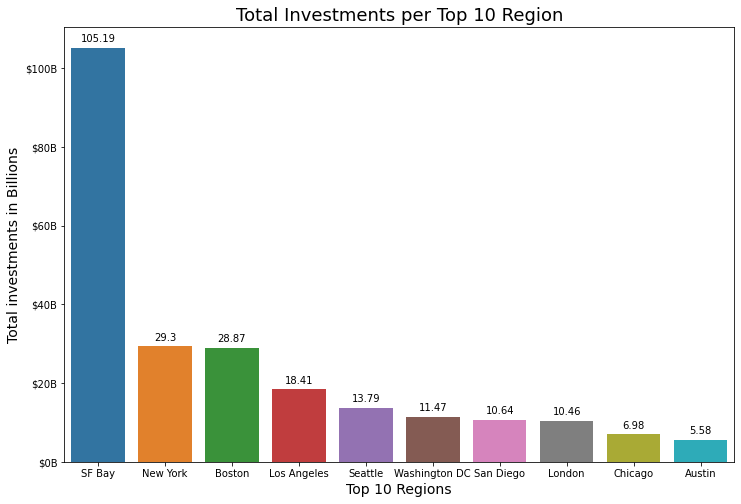

In [ ]:
#now lets plot 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'region' , y='funding_total_usd', data= region_df_top10)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-9, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Top 10 Regions', size=14)
plt.ylabel('Total investments in Billions', size= 14)
plt.title('Total Investments per Top 10 Region', size = 18)
plt.xticks(rotation = 0)
splot.yaxis.set_major_formatter(formatter)

Most investments are in the SF bay Area followed very tightly by New York and then Boston. 

Let's dig further and see which market category gets most investement in each of these region. (this is part 7) 

# **Exploratory Analysis 6 - Regions and categories**

This relates to the part above but is different. 

After identifying our top 7 regions, I will show which market category has had most investment in each of these regions. 

In [ ]:
region_cat_df = company_df[['region', 'category_code','funding_total_usd']]

In [ ]:
region_cat_df.head(2)

,region,category_code,funding_total_usd
0,Seattle,web,39750000.0
1,Los Angeles,games_video,0.0


In [ ]:
region_cat_df = region_cat_df.iloc[(region_cat_df['funding_total_usd'] != 0.0).values]

In [ ]:
region_cat_df = region_cat_df.iloc[(region_cat_df['region'] != 'unknown').values]

In [ ]:
region_cat_df = region_cat_df[region_cat_df['region'].isin(region_df_count[region_df_count >= 394].index)]

In [ ]:
region_cat_df_grouped = region_cat_df.groupby(['region', 'category_code']).sum().reset_index()

In [ ]:
region_cat_df_grouped.head()

,region,category_code,funding_total_usd
0,Austin,advertising,75299251.0
1,Austin,analytics,243029940.0
2,Austin,biotech,442870910.0
3,Austin,cleantech,667673083.0
4,Austin,consulting,77322320.0


In [ ]:
region_cat_pivot = region_cat_df_grouped.pivot(index= 'region', columns= 'category_code', values= 'funding_total_usd')

In [ ]:
region_cat_pivot.head(2)

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,government,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,pets,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austin,75299251.0,243029940.0,NaN,4.428709e+08,6.676731e+08,77322320.0,4000000.0,29391330.0,37627999.0,4.606555e+08,120000.0,109227649.0,80486308.0,NaN,255807692.0,53493230.0,28710072.0,NaN,25000.0,2599999.0,3.405250e+07,11042500.0,1.304552e+08,9849970.0,2322500.0,21699999.0,NaN,5500000.0,NaN,100000.0,113550000.0,NaN,9250063.0,103575853.0,331004065.0,13207498.0,9.217057e+08,NaN,44709996.0,514566458.0,384164001.0
Boston,702562698.0,501885628.0,2100000.0,8.720690e+09,3.117386e+09,451476850.0,2250000.0,510653589.0,123422766.0,1.816437e+09,43068000.0,176627790.0,323649075.0,NaN,701740597.0,784785984.0,31639487.0,7500000.0,1195003.0,279124093.0,2.200227e+09,27135062.0,1.098269e+09,63759185.0,624567998.0,622568375.0,38328020.0,53140000.0,NaN,1355236.0,500801401.0,198050743.0,100756000.0,439582647.0,203286621.0,120911141.0,3.044579e+09,14212000.0,6928663.0,16753000.0,547285605.0


In [ ]:
region_cat_pivot['max_fundings'] = region_cat_pivot.max(axis=1)
region_cat_pivot['max_category'] = region_cat_pivot.idxmax(axis=1)

In [ ]:
region_cat_pivot = region_cat_pivot.reset_index()

In [ ]:
region_cat_pivot = region_cat_pivot[['region','max_fundings','max_category']]
region_cat_pivot.head(2)

category_code,region,max_fundings,max_category
0,Austin,9.217057e+08,software
1,Boston,8.720690e+09,biotech


In [ ]:
region_cat_pivot['region_and_category'] = region_cat_pivot['region'].astype(str) + ' --> ' + region_cat_pivot['max_category'].astype(str)
region_cat_pivot.head(2)

category_code,region,max_fundings,max_category,region_and_category
0,Austin,9.217057e+08,software,Austin --> software
1,Boston,8.720690e+09,biotech,Boston --> biotech


In [ ]:
region_cat_pivot = region_cat_pivot.sort_values(by='max_fundings')

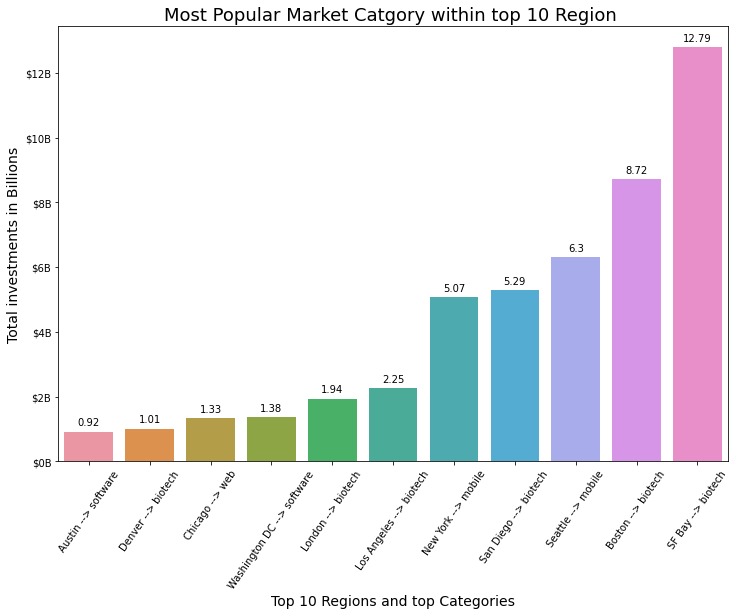

In [ ]:
#now lets plot 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'region_and_category' , y='max_fundings', data= region_cat_pivot)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-9, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Top 10 Regions and top Categories', size=14)
plt.ylabel('Total investments in Billions', size= 14)
plt.title('Most Popular Market Catgory within top 10 Region ', size = 18)
plt.xticks(rotation = 55)
splot.yaxis.set_major_formatter(formatter)

As we can see, biotech is again the leading category in each region. 

Mobile follows being the top category for two regions. 

### **Same as above but using average instead**

In [ ]:
region_cat_df.head(2)

,region,category_code,funding_total_usd
0,Seattle,web,39750000.0
13,SF Bay,web,5000000.0


In [ ]:
#lets now group by region and categories using average instead of total sum 
region_cat_df_grouped_avg = region_cat_df.groupby(['region', 'category_code']).mean().reset_index()

In [ ]:
region_cat_df_grouped_avg.head()

,region,category_code,funding_total_usd
0,Austin,advertising,8.366583e+06
1,Austin,analytics,2.025250e+07
2,Austin,biotech,1.640263e+07
3,Austin,cleantech,4.172957e+07
4,Austin,consulting,3.866116e+07


In [ ]:
#lets turn it into a pivot table in order to find max for each categories 
region_cat_pivot_avg = region_cat_df_grouped_avg.pivot(index= 'region', columns= 'category_code', values= 'funding_total_usd')

In [ ]:
region_cat_pivot_avg.head(2)

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,government,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,nonprofit,pets,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austin,8.366583e+06,2.025250e+07,NaN,1.640263e+07,4.172957e+07,38661160.0,4000000.0,2.671939e+06,9.407000e+06,1.706131e+07,120000.0,1.092276e+07,6.707192e+06,NaN,1.598798e+07,6686653.75,4785012.0,NaN,25000.0,649999.75,8.513125e+06,2.760625e+06,4.831673e+06,3.283323e+06,2322500.0,4.340000e+06,NaN,2750000.0,NaN,100000.0,1.622143e+07,NaN,3.083354e+06,1.294698e+07,1.947083e+07,1650937.25,1.152132e+07,NaN,44709996.0,2.572832e+08,1.600683e+07
Boston,1.713568e+07,1.115301e+07,2100000.0,3.253989e+07,3.996649e+07,20521675.0,2250000.0,1.702179e+07,5.610126e+06,1.996084e+07,8613600.0,1.358675e+07,1.116031e+07,NaN,1.375962e+07,19619649.60,6327897.4,3750000.0,597501.5,13956204.65,3.548752e+07,4.522510e+06,1.591694e+07,1.062653e+07,156141999.5,2.964611e+07,6.388003e+06,10628000.0,NaN,338809.0,2.384769e+07,2.829296e+07,2.015120e+07,1.690702e+07,9.680315e+06,12091114.10,1.301102e+07,3553000.0,3464331.5,5.584333e+06,7.297141e+06


In [ ]:
#Adding two new columns representing max and categories corresponding to max 
region_cat_pivot_avg['max_fundings'] = region_cat_pivot_avg.max(axis=1)
region_cat_pivot_avg['max_category'] = region_cat_pivot_avg.idxmax(axis=1)

In [ ]:
#resetting index so I can select columns I want 
region_cat_pivot_avg = region_cat_pivot_avg.reset_index()

In [ ]:
#Getting rid of columns that won't be used 
region_cat_pivot_avg = region_cat_pivot_avg[['region','max_fundings','max_category']]
region_cat_pivot_avg.head(2)

category_code,region,max_fundings,max_category
0,Austin,257283229.0,travel
1,Boston,156141999.5,nanotech


In [ ]:
#to be able to plot our graph and read labels, we need to concat year and category and add it as a new column 
#we change the type and can concat strings 

region_cat_pivot_avg['region_and_category'] = region_cat_pivot_avg['region'].astype(str) + ' --> ' + region_cat_pivot_avg['max_category'].astype(str)
region_cat_pivot_avg.head(2)

category_code,region,max_fundings,max_category,region_and_category
0,Austin,257283229.0,travel,Austin --> travel
1,Boston,156141999.5,nanotech,Boston --> nanotech


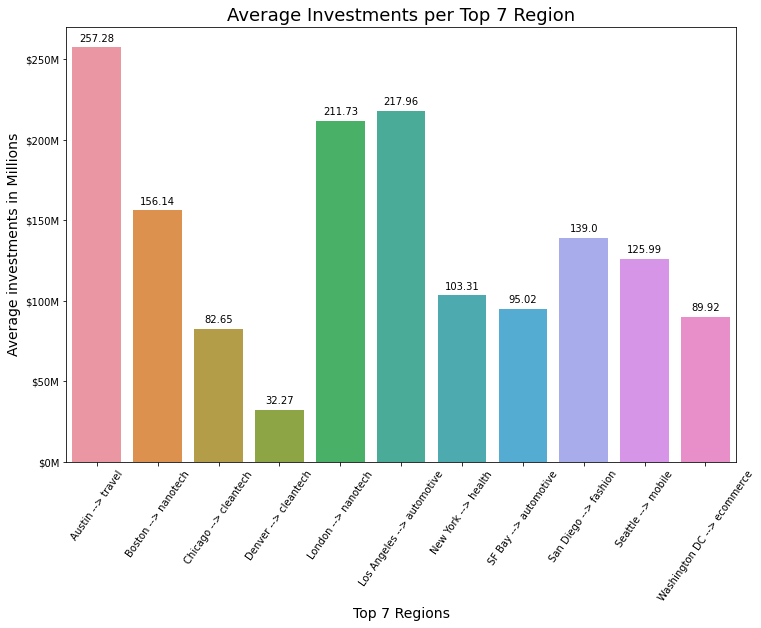

In [ ]:
#now lets plot 

#define function to modify y axis ticks 
def billions(x, pos):
  return '$%1.0fM' % (x * 1e-6)

formatter = FuncFormatter(billions)
#plotting 
plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'region_and_category' , y='max_fundings', data= region_cat_pivot_avg)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-6, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Top 7 Regions', size=14)
plt.ylabel('Average investments in Millions', size= 14)
plt.title('Average Investments per Top 7 Region', size = 18)
plt.xticks(rotation = 55)
splot.yaxis.set_major_formatter(formatter) 

#Market Categories average funding per category 




In [ ]:
avg_fundings = company_df[['category_code', 'funding_total_usd']]

In [ ]:
avg_fundings = pd.pivot_table(avg_fundings, index= 'category_code', aggfunc= {'category_code':'count', 'funding_total_usd': 'sum'})

In [ ]:
avg_fundings.head()

,category_code,funding_total_usd
category_code,,
advertising,6098,1.248819e+10
analytics,1022,6.698312e+09
automotive,291,3.594221e+09
biotech,4430,6.686868e+10
cleantech,1940,3.867019e+10


In [ ]:
avg_fundings = avg_fundings.rename(columns={'category_code': 'investment_count'})

In [ ]:
avg_fundings = avg_fundings.reset_index()

In [ ]:
avg_fundings = avg_fundings.iloc[(avg_fundings['category_code'] != 'enterprise').values]

In [ ]:
avg_fundings_top10 = avg_fundings.sort_values(by=['investment_count'], ascending= False).head(10)

In [ ]:
avg_fundings_top10

,category_code,investment_count,funding_total_usd
36,software,17922,4.176832e+10
40,web,15118,1.891835e+10
7,ecommerce,9065,1.762815e+10
12,games_video,7520,1.472512e+10
22,mobile,6862,2.989867e+10
0,advertising,6098,1.248819e+10
5,consulting,5006,2.616850e+09
3,biotech,4430,6.686868e+10
14,hardware,2951,1.496217e+10
8,education,2901,3.948519e+09


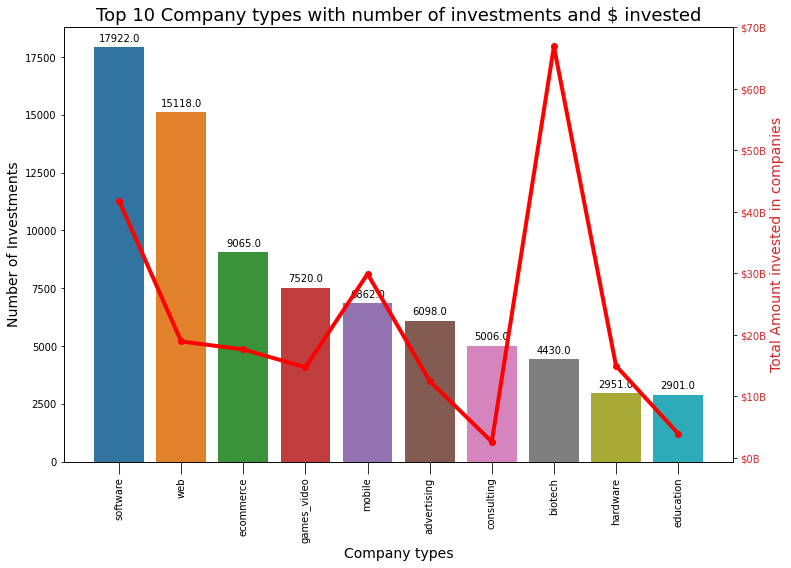

In [ ]:
#plotting top 10 startup type by number of acquisition and the corresponding amount of dollars raised by these startup types 

plt.figure(figsize=(12,8))

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-9)
formatter = FuncFormatter(billions)

ax = sns.barplot(x= 'category_code', y='investment_count', data = avg_fundings_top10)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), avg_fundings_top10[['funding_total_usd']].values, color='red', linestyle='-', marker='o', linewidth=4.0) 

for p in ax.patches: 
  ax.annotate(np.round(p.get_height(),decimals = 0),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')


color = 'tab:red'
ax.set_xlabel('Company types', size =14)
ax.set_ylabel('Number of Investments', size = 14)
ax.tick_params('x',rotation = 90, size = 12)
ax2.set_ylabel('Total Amount invested in companies', color = color, size= 14)
ax2.tick_params(labelcolor=color)
ax2.yaxis.set_major_formatter(formatter)
ax.set_title('Top 10 Company types with number of investments and $ invested', size=18)

ax.grid(False)
ax2.grid(False)

# **Exploratory Analysis 7 - Market categories**

This will be an introduction to a larger part. 

I wanted to show the distribution of market categories across the US market. This is by the number of companies in our data. 


In [ ]:
company_df.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,NaN,Flektor,flektor,games_video,acquired,NaN,NaN,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6


In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109569 entries, 0 to 196552
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   object_id            109569 non-null  object 
 1   entity_type          109569 non-null  object 
 2   entity_id            109569 non-null  int64  
 3   parent_id            0 non-null       object 
 4   name                 109569 non-null  object 
 5   normalized_name      109569 non-null  object 
 6   category_code        109569 non-null  object 
 7   status               109569 non-null  object 
 8   founded_at           80201 non-null   object 
 9   closed_at            2427 non-null    object 
 10  short_description    6641 non-null    object 
 11  description          78600 non-null   object 
 12  country_code         74042 non-null   object 
 13  state_code           42425 non-null   object 
 14  city                 70578 non-null   object 
 15  region           

In [ ]:
company_df_nodups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109569 entries, 0 to 196552
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   object_id            109569 non-null  object 
 1   entity_type          109569 non-null  object 
 2   entity_id            109569 non-null  int64  
 3   parent_id            0 non-null       object 
 4   name                 109569 non-null  object 
 5   normalized_name      109569 non-null  object 
 6   category_code        109569 non-null  object 
 7   status               109569 non-null  object 
 8   founded_at           80201 non-null   object 
 9   closed_at            2427 non-null    object 
 10  short_description    6641 non-null    object 
 11  description          78600 non-null   object 
 12  country_code         74042 non-null   object 
 13  state_code           42425 non-null   object 
 14  city                 70578 non-null   object 
 15  region           

In [ ]:
company_df_nodups = company_df.drop_duplicates(subset='object_id', keep= 'first')

In [ ]:
usa_types = company_df_nodups[['country_code', 'category_code']]

In [ ]:
usa_types = usa_types.dropna()
usa_types.head()

,country_code,category_code
0,USA,web
1,USA,games_video
2,USA,games_video
5,MAR,advertising
6,IND,cleantech


In [ ]:
usa_types = usa_types.iloc[(usa_types['country_code']== 'USA').values]
usa_types.head()

,country_code,category_code
0,USA,web
1,USA,games_video
2,USA,games_video
8,USA,advertising
12,USA,advertising


In [ ]:
usa_types_grouped = usa_types.groupby(['category_code']).count().sort_values(by='country_code', ascending= False )
usa_types_grouped_top10 = usa_types_grouped.head(10)

In [ ]:
usa_types_grouped_top10.head()

,country_code
category_code,
software,7642
web,5584
biotech,3001
ecommerce,2766
advertising,2579


Text(0.5, 1.0, 'US Startup market types')

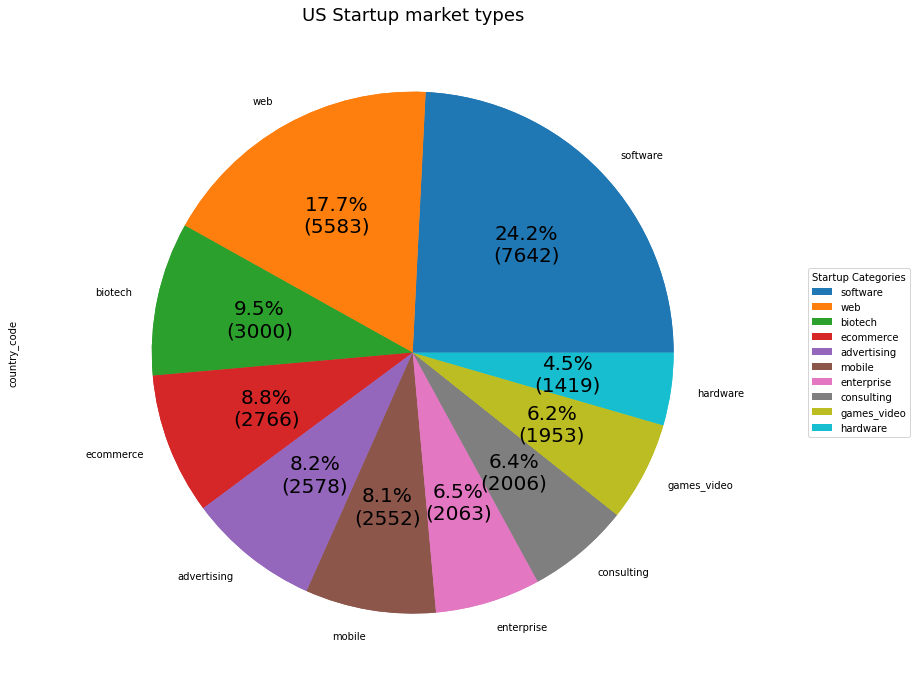

In [ ]:
#trying to make label size larger.. 
ax3 = usa_types_grouped_top10.plot.pie(y='country_code', figsize=(14,12))
plt.axis('equal')
data = usa_types_grouped_top10['country_code']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


ax3.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(size=20))

ax3.legend(title="Startup Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax3.set_title('US Startup market types', size= 18)

Text(0.5, 1.0, 'US Startup market types')

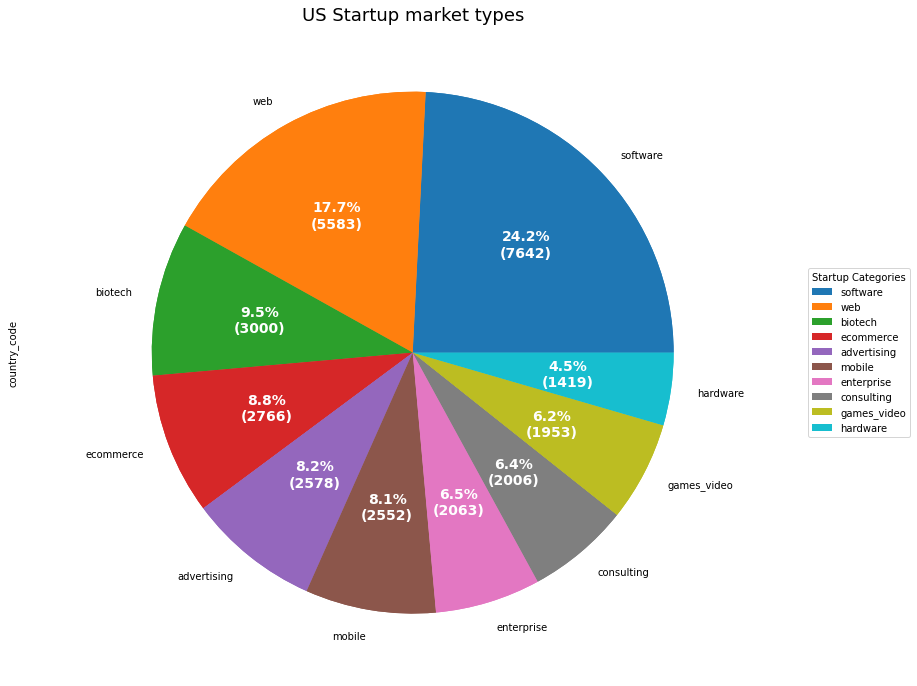

In [ ]:
ax3 = usa_types_grouped_top10.plot.pie(y='country_code', figsize=(14,12))
plt.axis('equal')
data = usa_types_grouped_top10['country_code']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax3.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w", size=14))

ax3.legend(title="Startup Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


plt.setp(autotexts, size=14, weight="bold")

ax3.set_title('US Startup market types', size= 18)

As we can see, our top categories within the US market are Web, Software and biotech. 

Software definitely is the larger market category with a total of 7642 companies which is 24.2% of our total dataset. 

# **Exploratory Analysis 8 - Investments over time**

This will be an intro part as well to show an aspect of our data distribution. 

In which country are most of our companies located ? 

We will only look at countries that have at least 200 data point (meaning companies). This sums up to the top 12 countries by total number of companies. 


In [ ]:
countries_df = company_df_new[['country_code', 'funding_total_usd']]

In [ ]:
countries_df.head(2)

,country_code,funding_total_usd
0,USA,39750000.0
1,USA,0.0


In [ ]:
countries_df = countries_df.iloc[(countries_df['funding_total_usd'] != 0.0).values]

In [ ]:
countries_df_count = countries_df['country_code'].value_counts()
countries_df_count.head(10)

USA    18142
GBR     1676
CAN      853
FRA      626
ISR      467
DEU      451
IND      399
ESP      329
CHN      273
SWE      220
Name: country_code, dtype: int64

In [ ]:
#lets get rid of countries with less than 200 values 
countries_df = countries_df[countries_df['country_code'].isin(countries_df_count[countries_df_count >= 220].index)]

In [ ]:
countries_df_grouped = countries_df.groupby(['country_code']).sum().reset_index()

In [ ]:
countries_df_grouped

,country_code,funding_total_usd
0,CAN,9.866362e+09
1,CHN,1.068974e+10
2,DEU,5.765774e+09
3,ESP,2.137335e+09
4,FRA,4.595138e+09
5,GBR,1.770562e+10
6,IND,6.141410e+09
7,ISR,4.480092e+09
8,SWE,1.608107e+09
9,USA,3.105884e+11


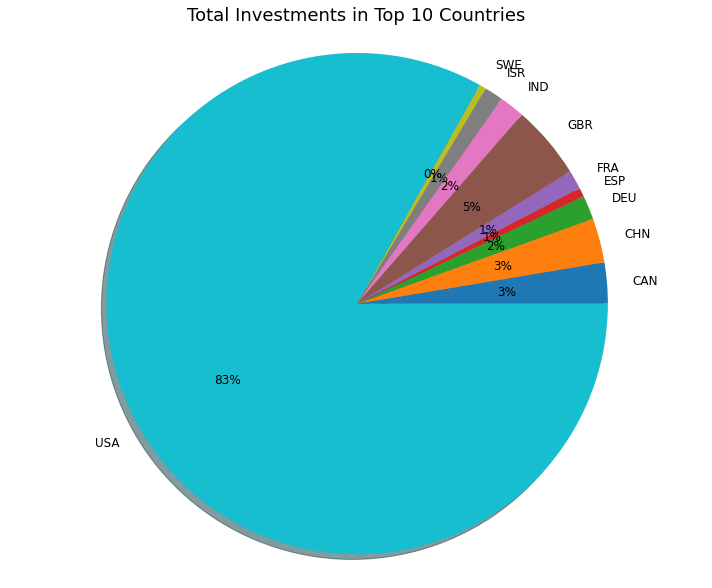

In [ ]:
# Pie chart showing where most fundings are in the US 
plt.rcParams['figure.figsize'] = 10,8
labels = countries_df_grouped['country_code']
sizes = countries_df_grouped['funding_total_usd']

fig5, ax5 = plt.subplots()
ax5.pie(sizes, labels=labels, autopct= '%1.0f%%',textprops= dict(size= 12), shadow=True, startangle=0)
ax5.axis('equal')
plt.setp(autotexts, size = 20, weight='bold')
fig5.tight_layout()
plt.title('Total Investments in Top 10 Countries', size = 18)
plt.show()

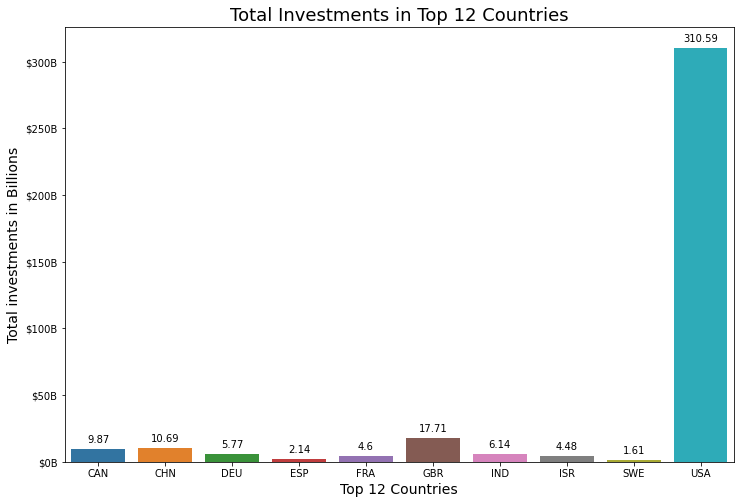

In [ ]:
#now lets plot 

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'country_code' , y='funding_total_usd', data= countries_df_grouped)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-9, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Top 12 Countries', size=14)
plt.ylabel('Total investments in Billions', size= 14)
plt.title('Total Investments in Top 12 Countries', size = 18)
plt.xticks(rotation = 0)
splot.yaxis.set_major_formatter(formatter)

As we can see most of our investments are located in the US.

## **Average fundings invested by country**

This will not be used. 

In [ ]:
#lets do the same but using the average investment amount instead 
 
countries_df_grouped_avg = countries_df.groupby(['country_code']).mean().reset_index()

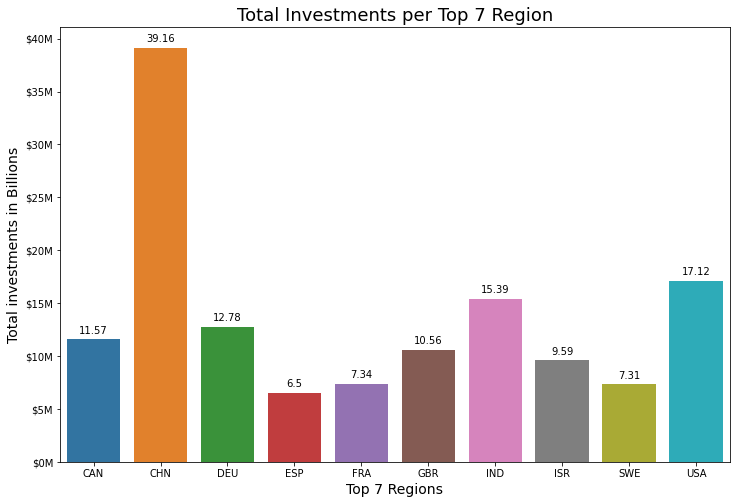

In [ ]:
#now lets plot 

#define function to modify y axis ticks 
def billions(x, pos):
  return '$%1.0fM' % (x * 1e-6)

formatter = FuncFormatter(billions)
#plotting 
plt.figure(figsize=(12,8))
splot = sns.barplot(x= 'country_code' , y='funding_total_usd', data= countries_df_grouped_avg)
for p in splot.patches: 
  splot.annotate(np.round(p.get_height()*1e-6, decimals = 2),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')
plt.xlabel('Top 7 Regions', size=14)
plt.ylabel('Total investments in Billions', size= 14)
plt.title('Total Investments per Top 7 Region', size = 18)
plt.xticks(rotation = 0)
splot.yaxis.set_major_formatter(formatter)

#**Exploratory Analysis 9 - Acquired companies**

What Category type has aqcuired which category type the most. 

I may include this as the form of a table. Or simply write my results in one of my presentation slide. 

This is using the acquired table to find which market categories has done most acquisitions of other companies and what other type of categories have they bought most. 

results below. 

In [ ]:
acquisitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9562 non-null   int64  
 1   acquisition_id       9562 non-null   int64  
 2   acquiring_object_id  9562 non-null   object 
 3   acquired_object_id   9561 non-null   object 
 4   term_code            1906 non-null   object 
 5   price_amount         9562 non-null   float64
 6   price_currency_code  9558 non-null   object 
 7   acquired_at          9533 non-null   object 
 8   source_url           8566 non-null   object 
 9   source_description   8590 non-null   object 
 10  created_at           9562 non-null   object 
 11  updated_at           9562 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 896.6+ KB


In [ ]:
acquiring_df = acquisitions_df[['acquisition_id','acquiring_object_id', 'price_amount']]

In [ ]:
acquired_df = acquisitions_df[['acquisition_id','acquired_object_id', 'price_amount']]

In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109569 entries, 0 to 196552
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   object_id            109569 non-null  object 
 1   entity_type          109569 non-null  object 
 2   entity_id            109569 non-null  int64  
 3   parent_id            0 non-null       object 
 4   name                 109569 non-null  object 
 5   normalized_name      109569 non-null  object 
 6   category_code        109569 non-null  object 
 7   status               109569 non-null  object 
 8   founded_at           80201 non-null   object 
 9   closed_at            2427 non-null    object 
 10  short_description    6641 non-null    object 
 11  description          78600 non-null   object 
 12  country_code         74042 non-null   object 
 13  state_code           42425 non-null   object 
 14  city                 70578 non-null   object 
 15  region           

In [ ]:
acquiring_df = acquiring_df.rename(columns={'acquiring_object_id': 'object_id'})

In [ ]:
acquired_df = acquired_df.rename(columns={'acquired_object_id': 'object_id'})

In [ ]:
#now we can start joining tables for acquiring companies - acquiring  
acquiring_cat_df = pd.merge(acquiring_df, company_df, on = "object_id")

In [ ]:
#now we can join our two tables for acquired companies - acquired
acquired_cat_df = pd.merge(acquired_df, company_df, on = "object_id")

In [ ]:
acquiring_cat_df.head(2)

,acquisition_id,object_id,price_amount,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,1,c:11,20000000.0,Company,11,NaN,Fox Interactive Media,fox interactive media,web,operating,1979-06-01,NaN,Fox Interactive Media is a network of companie...,NaN,USA,CA,Beverly Hills,Los Angeles,2006-03-01,2013-08-19,2,2,NaN,NaN,0,0.0,NaN,NaN,0,66
1,56,c:11,700000000.0,Company,11,NaN,Fox Interactive Media,fox interactive media,web,operating,1979-06-01,NaN,Fox Interactive Media is a network of companie...,NaN,USA,CA,Beverly Hills,Los Angeles,2006-03-01,2013-08-19,2,2,NaN,NaN,0,0.0,NaN,NaN,0,66


In [ ]:
acquired_cat_df.head(2)

,acquisition_id,object_id,price_amount,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,1,c:10,20000000.0,Company,10,NaN,Flektor,flektor,games_video,acquired,NaN,NaN,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6
1,7,c:72,60000000.0,Company,72,NaN,GrandCentral,grandcentral,mobile,acquired,2006-04-01,NaN,NaN,NaN,USA,CA,Fremont,SF Bay,NaN,NaN,0,0,2006-01-01,2006-01-01,1,4000000.0,2005-11-03,2013-09-12,4,9


In [ ]:
acquired_cat_df = acquired_cat_df[['acquisition_id', 'object_id', 'category_code', 'price_amount']]

In [ ]:
acquiring_cat_df = acquiring_cat_df[['acquisition_id', 'object_id', 'category_code', 'price_amount']]

In [ ]:
acquired_cat_df.head(2)

,acquisition_id,object_id,category_code,price_amount
0,1,c:10,games_video,20000000.0
1,7,c:72,mobile,60000000.0


In [ ]:
acquiring_cat_df = acquiring_cat_df.rename(columns={'category_code': 'acquiring_type'})

In [ ]:
acquired_cat_df = acquired_cat_df.rename(columns={'category_code': 'acquired_type'})

In [ ]:
acquiring_cat_df.head(2)

,acquisition_id,object_id,acquiring_type,price_amount
0,1,c:11,web,20000000.0
1,56,c:11,web,700000000.0


In [ ]:
#lets merge again 
deals_df = pd.merge(acquiring_cat_df, acquired_cat_df, on = "acquisition_id")

In [ ]:
deals_df.head(2)

,acquisition_id,object_id_x,acquiring_type,price_amount_x,object_id_y,acquired_type,price_amount_y
0,1,c:11,web,20000000.0,c:10,games_video,20000000.0
1,56,c:11,web,700000000.0,c:667,games_video,700000000.0


In [ ]:
deals_df = deals_df[['acquiring_type', 'acquired_type']]

In [ ]:
deals_df.head(2)

,acquiring_type,acquired_type
0,web,games_video
1,web,games_video


In [ ]:
deals_df = deals_df.iloc[(deals_df['acquiring_type'] != 'enterprise').values]

In [ ]:
#count of deals 
deals_pivot = deals_df.pivot_table(values='acquired_type', columns= 'acquiring_type', aggfunc= 'count')

In [ ]:
deals_pivot_2 = pd.pivot_table(deals_df, index=['acquiring_type'], columns='acquired_type', aggfunc= {'acquired_type':'count'})

In [ ]:
deals_pivot_2.head(2)

acquired_type                       ...                            
acquired_type    advertising analytics automotive  ... transportation travel   web
acquiring_type                                     ...                            
advertising             91.0       2.0        NaN  ...            NaN    1.0  66.0
analytics                2.0       5.0        NaN  ...            NaN    NaN   2.0

[2 rows x 38 columns]

In [ ]:
deals_pivot_2.columns = deals_pivot_2.columns.droplevel(0)

In [ ]:
deals_pivot_2['max_count'] = deals_pivot_2.max(axis=1)
deals_pivot_2['max_type'] = deals_pivot_2.idxmax(axis=1)

In [ ]:
deals_pivot_2.head(2)

acquired_type,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web,max_count,max_type
acquiring_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
advertising,91.0,2.0,NaN,NaN,NaN,3.0,NaN,14.0,1.0,12.0,1.0,NaN,11.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,19.0,NaN,NaN,3.0,1.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,31.0,NaN,NaN,1.0,66.0,91.0,advertising
analytics,2.0,5.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,2.0,7.0,software


In [ ]:
deals_pivot_2['total_count'] = deals_pivot_2.sum(axis=1)

In [ ]:
deals_pivot_2.head(2)

acquired_type,advertising,analytics,automotive,biotech,cleantech,consulting,design,ecommerce,education,enterprise,fashion,finance,games_video,hardware,health,hospitality,legal,local,manufacturing,medical,messaging,mobile,music,nanotech,network_hosting,news,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web,max_count,max_type,total_count
acquiring_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
advertising,91.0,2.0,NaN,NaN,NaN,3.0,NaN,14.0,1.0,12.0,1.0,NaN,11.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,19.0,NaN,NaN,3.0,1.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,31.0,NaN,NaN,1.0,66.0,91.0,advertising,361.0
analytics,2.0,5.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,2.0,7.0,software,36.0


In [ ]:
deals_pivot_2 = deals_pivot_2.reset_index()

In [ ]:
deals_pivot_2 = deals_pivot_2[['acquiring_type','total_count','max_count', 'max_type']]

In [ ]:
deals_pivot_2.head(2)

acquired_type,acquiring_type,total_count,max_count,max_type
0,advertising,361.0,91.0,advertising
1,analytics,36.0,7.0,software


In [ ]:
deals_pivot_2['max_count'] = deals_pivot_2['max_count'].astype(int)

In [ ]:
deals_pivot_2['count_and_type'] = deals_pivot_2['max_count'].astype(str) + '  acquisitions  -->  ' + deals_pivot_2['max_type'].astype(str)
deals_pivot_2.head(2)

acquired_type,acquiring_type,total_count,max_count,max_type,count_and_type
0,advertising,361.0,91,advertising,91 acquisitions --> advertising
1,analytics,36.0,7,software,7 acquisitions --> software


In [ ]:
deals_pivot_2 = deals_pivot_2.sort_values(by='max_count', ascending= False)

In [ ]:
deals_pivot_2_top5 = deals_pivot_2.head(5)
deals_pivot_2_top5

acquired_type,acquiring_type,total_count,max_count,max_type,count_and_type
34,software,1717.0,585,software,585 acquisitions --> software
3,biotech,741.0,347,biotech,347 acquisitions --> biotech
38,web,1075.0,315,web,315 acquisitions --> web
10,games_video,394.0,141,games_video,141 acquisitions --> games_video
20,mobile,367.0,102,mobile,102 acquisitions --> mobile


In [ ]:
deals_pivot_2_top5 = deals_pivot_2_top5[['acquiring_type', 'total_count','count_and_type']]

In [ ]:
deals_pivot_2_top5

acquired_type,acquiring_type,total_count,count_and_type
34,software,1717.0,585 acquisitions --> software
3,biotech,741.0,347 acquisitions --> biotech
38,web,1075.0,315 acquisitions --> web
10,games_video,394.0,141 acquisitions --> games_video
20,mobile,367.0,102 acquisitions --> mobile


This table above is what I will use to show in my presentation. 

Our results make sense and show that almost each category tend to acquire the same category as itself. 


# **Exploratory Analysis 10 - Acquired Companies**

For this part I want to focus on the acquisition table. 

What were the startup market categories that got most acquired ?

What's the total amount of fundings per category ?


In [ ]:
acquired_cat_df.head()

,acquisition_id,object_id,acquired_type,price_amount
0,1,c:10,games_video,20000000.0
1,7,c:72,mobile,60000000.0
2,8,c:132,music,280000000.0
3,9,c:155,web,100000000.0
4,10,c:215,web,25000000.0


In [ ]:
acquired_cat_count = pd.pivot_table(acquired_cat_df, index= 'acquired_type', aggfunc= {'acquired_type':'count', 'price_amount': 'sum'})

In [ ]:
acquired_cat_count.head()

,acquired_type,price_amount
acquired_type,,
advertising,320,2.234179e+10
analytics,40,5.430000e+08
automotive,5,7.643000e+09
biotech,457,1.936875e+11
cleantech,116,1.881033e+10


In [ ]:
acquired_cat_count = acquired_cat_count.rename(columns={'acquired_type': 'acquired_type_count'})

In [ ]:
acquired_cat_count = acquired_cat_count.reset_index()

In [ ]:
acquired_cat_count = acquired_cat_count.iloc[(acquired_cat_count['acquired_type'] != 'enterprise').values]

In [ ]:
acquired_top5_usd = acquired_cat_count.sort_values(by=['price_amount']).tail(10)

In [ ]:
acquired_top5_usd

,acquired_type,acquired_type_count,price_amount
13,hardware,202,2.205064e+10
0,advertising,320,2.234179e+10
24,network_hosting,206,2.458829e+10
32,semiconductor,154,3.139019e+10
12,games_video,353,3.937296e+10
21,mobile,423,4.224499e+10
38,web,1005,7.369295e+10
28,public_relations,223,1.351532e+11
34,software,1477,1.585910e+11
3,biotech,457,1.936875e+11


In [ ]:
acquired_top10 = acquired_cat_count.sort_values(by=['acquired_type_count']).tail(10)

In [ ]:
acquired_top10

,acquired_type,acquired_type_count,price_amount
13,hardware,202,2.205064e+10
24,network_hosting,206,2.458829e+10
28,public_relations,223,1.351532e+11
7,ecommerce,282,1.519656e+10
0,advertising,320,2.234179e+10
12,games_video,353,3.937296e+10
21,mobile,423,4.224499e+10
3,biotech,457,1.936875e+11
38,web,1005,7.369295e+10
34,software,1477,1.585910e+11


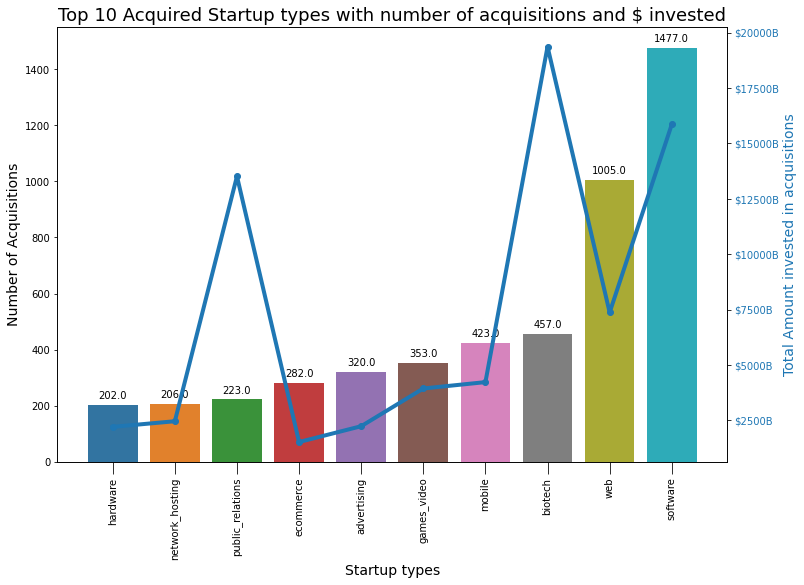

In [ ]:
#plotting top 10 startup type by number of acquisition and the corresponding amount of dollars raised by these startup types 

plt.figure(figsize=(12,8))

def billions(x, pos):
  return '$%1.0fB' % (x * 1e-7)
formatter = FuncFormatter(billions)

ax = sns.barplot(x= 'acquired_type', y='acquired_type_count', data = acquired_top10)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), acquired_top10[['price_amount']].values, linestyle='-', marker='o', linewidth=4.0) 

for p in ax.patches: 
  ax.annotate(np.round(p.get_height(),decimals = 0),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')


color = 'tab:blue'
ax.set_xlabel('Startup types', size =14)
ax.set_ylabel('Number of Acquisitions', size = 14)
ax.tick_params('x',rotation = 90, size = 12)
ax2.set_ylabel('Total Amount invested in acquisitions', color = color, size= 14)
ax2.tick_params(labelcolor=color)
ax2.yaxis.set_major_formatter(formatter)
ax.set_title('Top 10 Acquired Startup types with number of acquisitions and $ invested', size=18)

ax.grid(False)
ax2.grid(False)

As we can see in this graph, the software category is the one that has the most number of acquisitions. 

But what's interesting is that if we base our results by the total price amount of all acquisitions, we can see that biotech category is the one that has received most money at acquisition. 

We can also see that public relation category has an unusually high amount of money for acquisitions compare to its number of acquisitions. This may be due to a few outliners in that category. 

## **same as above but with averages**

I wont be using this one. 

In [ ]:
####now lets plot by average 
acquired_cat_count_avg = pd.pivot_table(acquired_cat_df, index= 'acquired_type', aggfunc= {'acquired_type':'count', 'price_amount': 'mean'})

In [ ]:
#we need to rename our acquired type 
acquired_cat_count_avg = acquired_cat_count_avg.rename(columns={'acquired_type': 'acquired_type_count'})

In [ ]:
acquired_cat_count_avg = acquired_cat_count_avg.reset_index()

In [ ]:
#lets get rid of the enterprise type as this is an ambiguous category 
acquired_cat_count_avg = acquired_cat_count_avg.iloc[(acquired_cat_count_avg['acquired_type'] != 'enterprise').values]

In [ ]:
#lets only keey the top 5 values 
acquired_top10_avg = acquired_cat_count_avg.sort_values(by=['acquired_type_count']).tail(10)

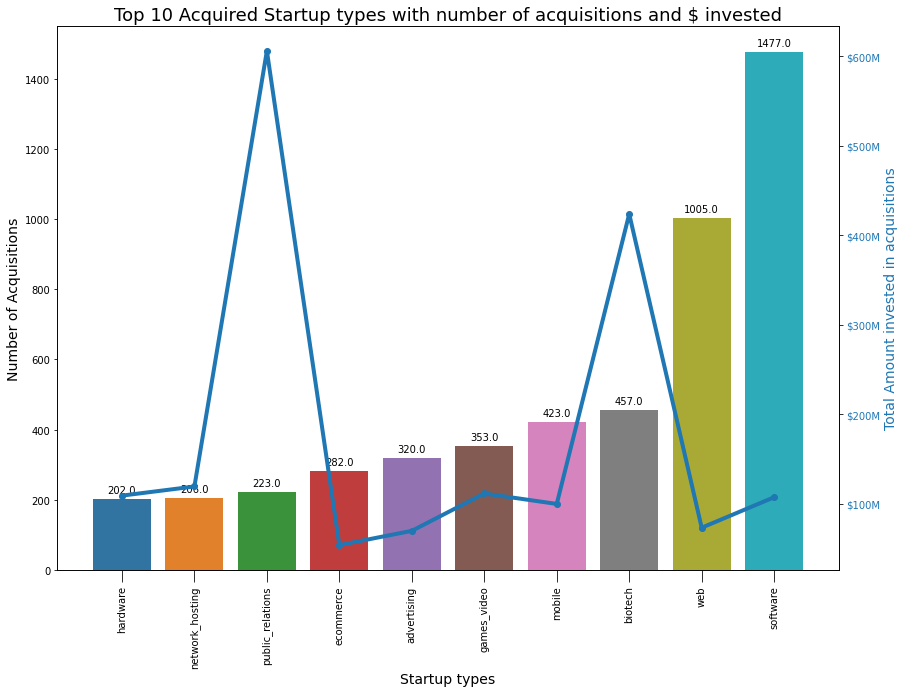

In [ ]:
#plotting top 10 startup type by number of acquisition and the corresponding amount of dollars raised by these startup types 

plt.figure(figsize=(14,10))

def billions(x, pos):
  return '$%1.0fM' % (x * 1e-6)
formatter = FuncFormatter(billions)

ax = sns.barplot(x= 'acquired_type', y='acquired_type_count', data = acquired_top10_avg)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), acquired_top10_avg[['price_amount']].values, linestyle='-', marker='o', linewidth=4.0) 

for p in ax.patches: 
  ax.annotate(np.round(p.get_height(),decimals = 0),  
                 (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0,9),
                 textcoords = 'offset points')


color = 'tab:blue'
ax.set_xlabel('Startup types', size =14)
ax.set_ylabel('Number of Acquisitions', size = 14)
ax.tick_params('x',rotation = 90, size = 12)
ax2.set_ylabel('Total Amount invested in acquisitions', color = color, size= 14)
ax2.tick_params(labelcolor=color)
ax2.yaxis.set_major_formatter(formatter)
ax.set_title('Top 10 Acquired Startup types with number of acquisitions and $ invested', size=18)

ax.grid(False)
ax2.grid(False)

# **T-tests - Market Categories**

This part is all t-tests in between different market categories. 

I wanted to see if there would be a significant difference in fundings between different startup types. 

For example, can we significantly say that biotech companies get more fundings than software comapanies ? 

This part will be included in my market categoy section. 



*   Mobile companies Vs Video Games companies 
*   Biotech companies Vs Health companies 
*   E-commerce Vs Advertising 
*   Software Vs Hardware 



In [ ]:
company_df.head(2)

,object_id,entity_type,entity_id,parent_id,name,normalized_name,category_code,status,founded_at,closed_at,short_description,description,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,NaN,Wetpaint,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,NaN,Flektor,flektor,games_video,acquired,NaN,NaN,NaN,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6


In [ ]:
categories_df = company_df[['object_id', 'category_code', 'funding_total_usd']]
categories_df.head(3)

,object_id,category_code,funding_total_usd
0,c:1,web,39750000.0
1,c:10,games_video,0.0
2,c:100,games_video,0.0


In [ ]:
#lets only use rows that have a positive total fundings 
no_zero = (categories_df['funding_total_usd'] != 0.0)
categories_df = categories_df.iloc[no_zero.values]

In [ ]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26320 entries, 0 to 196552
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          26320 non-null  object 
 1   category_code      26320 non-null  object 
 2   funding_total_usd  26320 non-null  float64
dtypes: float64(1), object(2)
memory usage: 822.5+ KB


###T-test between fundings in video games and mobile startups. 

Null: No difference between our two categories 

In [ ]:
games_video = categories_df.iloc[(categories_df['category_code']== 'games_video').values]
games_video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 41 to 196540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          1167 non-null   object 
 1   category_code      1167 non-null   object 
 2   funding_total_usd  1167 non-null   float64
dtypes: float64(1), object(2)
memory usage: 36.5+ KB


In [ ]:
mobile = categories_df.iloc[(categories_df['category_code']== 'mobile').values]
mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 26 to 196526
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          1829 non-null   object 
 1   category_code      1829 non-null   object 
 2   funding_total_usd  1829 non-null   float64
dtypes: float64(1), object(2)
memory usage: 57.2+ KB


In [ ]:
stats.ttest_ind(games_video['funding_total_usd'], mobile['funding_total_usd'])

Ttest_indResult(statistic=-0.7479684183384462, pvalue=0.4545379521965296)

In [ ]:
mobile_df.describe()

,funding_total_usd
count,8.970000e+02
mean,2.424110e+07
std,2.340527e+08
min,5.000000e+03
25%,7.200000e+05
50%,2.600000e+06
75%,1.012500e+07
max,5.700000e+09


In [ ]:
games_video.describe()

,funding_total_usd
count,1.167000e+03
mean,1.261792e+07
std,4.969811e+07
min,1.500000e+03
25%,4.000000e+05
50%,1.960000e+06
75%,8.500000e+06
max,8.602130e+08


Result: We cannot reject the Null as our p-value is too high. There is no significant difference in the two category means  


###T-test between biotech and health 

In [ ]:
biotech = categories_df.iloc[(categories_df['category_code']== 'biotech').values]
biotech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3103 entries, 40 to 196518
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          3103 non-null   object 
 1   category_code      3103 non-null   object 
 2   funding_total_usd  3103 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.0+ KB


In [ ]:
health = categories_df.iloc[(categories_df['category_code']== 'health').values]
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 19 to 196388
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          571 non-null    object 
 1   category_code      571 non-null    object 
 2   funding_total_usd  571 non-null    float64
dtypes: float64(1), object(2)
memory usage: 17.8+ KB


In [ ]:
stats.ttest_ind(biotech['funding_total_usd'], health['funding_total_usd'])

Ttest_indResult(statistic=2.2877232340450337, pvalue=0.022210243167955817)

In [ ]:
#lets calculate coonfidence interval 

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(biotech['funding_total_usd'],health['funding_total_usd'])

'The difference in means at the 95% confidence interval (two-tail) is between -16640910.901150813 and 2179327.556332821.'

Results: Lets dig further as our p-value indicates that this difference could not be due to random chance only 
The difference in standard deviation of 2.28 seems to mean that biotech companies tend to get higher fundings than health companies 

In [ ]:
biotech.describe()

,funding_total_usd
count,3.103000e+03
mean,2.154969e+07
std,5.830483e+07
min,1.000000e+03
25%,1.500000e+06
50%,6.300000e+06
75%,2.351130e+07
max,2.400000e+09


In [ ]:
health.describe()

,funding_total_usd
count,5.710000e+02
mean,1.431890e+07
std,1.119652e+08
min,3.750000e+03
25%,3.000000e+05
50%,1.400000e+06
75%,6.600256e+06
max,2.600000e+09


###T-test between e-commerce and advertising

In [ ]:
e_commerce = categories_df.iloc[(categories_df['category_code']== 'ecommerce').values]
e_commerce.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 134 to 196552
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          1334 non-null   object 
 1   category_code      1334 non-null   object 
 2   funding_total_usd  1334 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.7+ KB


In [ ]:
advertising = categories_df.iloc[(categories_df['category_code']== 'advertising').values]
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 200 to 196547
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          1082 non-null   object 
 1   category_code      1082 non-null   object 
 2   funding_total_usd  1082 non-null   float64
dtypes: float64(1), object(2)
memory usage: 33.8+ KB


In [ ]:
stats.ttest_ind(e_commerce['funding_total_usd'], advertising['funding_total_usd'])

Ttest_indResult(statistic=0.9273889129457092, pvalue=0.3538173555769778)

Results: We cannot reject the Null 

###T-test between hardware and software 

In [ ]:
hardware = categories_df.iloc[(categories_df['category_code']== 'hardware').values]
hardware.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 202 to 196298
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          969 non-null    object 
 1   category_code      969 non-null    object 
 2   funding_total_usd  969 non-null    float64
dtypes: float64(1), object(2)
memory usage: 30.3+ KB


In [ ]:
software = categories_df.iloc[(categories_df['category_code']== 'software').values]
software.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 77 to 196522
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   object_id          4226 non-null   object 
 1   category_code      4226 non-null   object 
 2   funding_total_usd  4226 non-null   float64
dtypes: float64(1), object(2)
memory usage: 132.1+ KB


In [ ]:
stats.ttest_ind(hardware['funding_total_usd'], software['funding_total_usd'])

Ttest_indResult(statistic=4.4929462142351255, pvalue=7.176917085512058e-06)

In [ ]:
get_95_ci(hardware['funding_total_usd'],software['funding_total_usd'])

'The difference in means at the 95% confidence interval (two-tail) is between -9229576.305158954 and -1884796.7121275174.'

Results: There seem to be a significant difference in the two means. 
That implies that the mean for fundings for harware companies is higher than the mean for fundings in software companies by about 4.49 

In [ ]:
software.describe()

,funding_total_usd
count,4.226000e+03
mean,9.883654e+06
std,2.723551e+07
min,1.003000e+03
25%,6.000000e+05
50%,2.500500e+06
75%,9.543898e+06
max,9.650000e+08


In [ ]:
hardware.describe()

,funding_total_usd
count,9.690000e+02
mean,1.544084e+07
std,5.684820e+07
min,1.000000e+03
25%,6.597060e+05
50%,3.208104e+06
75%,1.174871e+07
max,1.100000e+09


###Biotech Vs Sotware 

In [ ]:
stats.ttest_ind(biotech['funding_total_usd'], software['funding_total_usd'])

Ttest_indResult(statistic=11.420653706922304, pvalue=5.903861509851328e-30)

# **T-test - Regions and categories**

This part is all t-tests 

lets run t-test on startup types and where they are located. Can we find a sginficant difference when it comes to the same startup type but at a different location ? 
Do some startup get most total fundings based on their locations ? 

I will run t-tests for these different categories. 

*   Biotech in SF Bay Vs Biotech in LA 
*   Biotech in SF Bay Vs Biotech in Boston
*   Biotech in Boston Vs Biotech in LA 
*   Mobile in New York Vs Mobile in Seattle



In [ ]:
region_cat_df.head()

,region,category_code,funding_total_usd
0,Seattle,web,39750000.0
13,SF Bay,web,5000000.0
19,SF Bay,health,68069200.0
20,Austin,cleantech,10125293.0
24,SF Bay,analytics,33000000.0


In [ ]:
region_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12197 entries, 0 to 196549
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             12197 non-null  object 
 1   category_code      12197 non-null  object 
 2   funding_total_usd  12197 non-null  float64
dtypes: float64(1), object(2)
memory usage: 381.2+ KB


In [ ]:
biotech_df = region_cat_df.iloc[(region_cat_df['category_code']== 'biotech').values]

In [ ]:
biotech_sf_df = biotech_df.iloc[(biotech_df['region']== 'SF Bay').values]

In [ ]:
biotech_sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1079 to 195333
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             377 non-null    object 
 1   category_code      377 non-null    object 
 2   funding_total_usd  377 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.8+ KB


In [ ]:
biotech_la_df = biotech_df.iloc[(biotech_df['region']== 'Los Angeles').values]

In [ ]:
biotech_la_df.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1878 to 191306
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             98 non-null     object 
 1   category_code      98 non-null     object 
 2   funding_total_usd  98 non-null     float64
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


Lets now run our t-test 

Null hypothesis: Is there a difference in mean between fundings of biotech startups in SF Bay and fundings of biotech startups in Los Angeles ?

In [ ]:
stats.ttest_ind(biotech_sf_df['funding_total_usd'], biotech_la_df['funding_total_usd'])
#results: Lets dig further 

Ttest_indResult(statistic=2.0858746341937975, pvalue=0.03752527055877921)

In [ ]:
biotech_sf_df.describe()

,funding_total_usd
count,3.770000e+02
mean,3.393784e+07
std,4.755936e+07
min,1.000000e+04
25%,4.500000e+06
50%,1.700000e+07
75%,4.400000e+07
max,3.800973e+08


In [ ]:
biotech_la_df.describe()

,funding_total_usd
count,9.800000e+01
mean,2.300617e+07
std,4.061611e+07
min,9.500000e+04
25%,1.525000e+06
50%,7.000000e+06
75%,2.944425e+07
max,2.476409e+08


T-test Result: 

I need to dig further. As we can see because of our low p-value, there is a significant difference between the means of biotechs in SF and biotechs in LA. 
Let's find that mean and now we can say that there is an approximate difference of 2.08 in the two means. 

In [ ]:
get_95_ci(biotech_sf_df['funding_total_usd'],biotech_la_df['funding_total_usd'])

'The difference in means at the 95% confidence interval (two-tail) is between -20297326.90251363 and -1566017.2260523885.'

In [ ]:
#T-test between biotech in sf vs biotech in Boston 
#separating for Boston 

In [ ]:
biotech_boston_df = biotech_df.iloc[(biotech_df['region']== 'Boston').values]

In [ ]:
biotech_boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 1719 to 194814
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             268 non-null    object 
 1   category_code      268 non-null    object 
 2   funding_total_usd  268 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.4+ KB


Lets now run our t-test 

Null hypothesis: Is there a difference in mean between fundings of biotech startups in SF Bay and fundings of biotech startups in Boston ?

Results: No significant difference found. 

In [ ]:
stats.ttest_ind(biotech_sf_df['funding_total_usd'], biotech_boston_df['funding_total_usd'])

Ttest_indResult(statistic=0.37316203095147416, pvalue=0.7091508386620999)

In [ ]:
biotech_boston_df.describe()

,funding_total_usd
count,2.680000e+02
mean,3.253989e+07
std,4.592363e+07
min,2.500000e+04
25%,4.080000e+06
50%,1.407500e+07
75%,4.464750e+07
max,3.190000e+08


Lets now run our t-test

Null hypothesis: Is there a difference in mean between fundings of biotech startups in Los Angeles and fundings of biotech startups in Boston ?

Results: No significant difference found - pvalue too high but close. 

In [ ]:
stats.ttest_ind(biotech_la_df['funding_total_usd'], biotech_boston_df['funding_total_usd'])

Ttest_indResult(statistic=-1.8119623913865526, pvalue=0.07081592921500811)

In [ ]:
#lets now check mobile type startups in New York Vs mobile type startups in Seattle 

mobile_df = region_cat_df.iloc[(region_cat_df['category_code']== 'mobile').values]

In [ ]:
mobile_NY_df = mobile_df.iloc[(mobile_df['region']== 'New York').values]
mobile_NY_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 171 to 195985
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             121 non-null    object 
 1   category_code      121 non-null    object 
 2   funding_total_usd  121 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.8+ KB


In [ ]:
mobile_seattle_df = mobile_df.iloc[(mobile_df['region']== 'Seattle').values]
mobile_seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1186 to 195750
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             50 non-null     object 
 1   category_code      50 non-null     object 
 2   funding_total_usd  50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


Lets now run our t-test 

Null hypothesis: Is there a difference in mean between fundings of mobile startups in New York and fundings of mobile startups in Seattle ?

Results: No significant difference found 

In [ ]:
stats.ttest_ind(mobile_NY_df['funding_total_usd'], mobile_seattle_df['funding_total_usd'])

Ttest_indResult(statistic=-0.942427797499386, pvalue=0.3473189072198838)

In [ ]:
mobile_NY_df.describe()

,funding_total_usd
count,1.210000e+02
mean,4.191389e+07
std,3.634317e+08
min,1.500000e+04
25%,5.000000e+05
50%,1.225000e+06
75%,4.705910e+06
max,3.985050e+09


In [ ]:
mobile_seattle_df.describe()

,funding_total_usd
count,5.000000e+01
mean,1.259867e+08
std,8.047579e+08
min,2.000000e+04
25%,8.625000e+05
50%,3.200000e+06
75%,7.150000e+06
max,5.700000e+09


#**Conclusion and Recommendations** 

After a deeper analysis, we cannot for certain say that the location of a company influences it's total amount of fundings. 

> We did find some significant difference for investment in biotech in SF bay and investment in biotech in Los Angeles, but I believe this result alone is not sufficient enought to confirm an hypotheses. 

We also found an important difference for acquired companies. We found that even though Software companies tend to have a much higher number of acquisitions, biotech companies were actually the ones that were accumulating the most money for acquisitions. 
This means that biotech companies have higher valuations than software companies and are therefore more valuable to investors.  